In [1]:
import os, csv 
import pandas as pd
from datetime import datetime


In [2]:
# DATA PATH 
movie_csv_path = "../selection-problems/data/p1_movie_metadata.csv"

In [3]:
# READING AND PUTTING THE CSV DATA IN df
df = pd.read_csv(movie_csv_path)
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [202]:
df = df.drop(['movie_title', 'movie_imdb_link', 'plot_keywords'], axis = 1)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [204]:
nan_columns = df.columns[df.isnull().any()]
nan_columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio'],
      dtype='object')

In [205]:
# for column in df.columns:
#     if df[column].dtype == 'object':
#         # If column contains strings, replace NaN with 'MISSING'
#         df[column].fillna('MISSING', inplace=True)
#     elif pd.api.types.is_numeric_dtype(df[column].dtype):
#         # If column is numeric, replace NaN with -1
#         df[column].fillna(-1, inplace=True)

df = df.dropna()

In [206]:
nan_columns = df.columns[df.isnull().any()]
nan_columns

Index([], dtype='object')

In [207]:
# def process_text(df_obj, columns=[]):
#     category_label_map = {}
#     for column in columns:
#         print(column)
#         unique_categories = sorted(df_obj[column].unique())
#         category_label_map[column] = {category: i if category != "MISSING" else category : -1 for i, category in enumerate(unique_categories)}    
#         df_obj[f'{column}_label'] = df_obj[column].map(category_label_map)

#         # df.drop(columns=['category'], inplace=True) # WE CAN DROP THxE COLUMN IF WE WANT
    
#     return df_obj, category_label_map

def process_text(df_obj, columns=[]):
    category_label_map = {}
    for column in columns:
        print(column)
        unique_categories = sorted(df_obj[column].unique())
               
        _category_label_map = {category: i for i, category in enumerate(unique_categories)}

        # Replace 'MISSING' with a placeholder value (-1)
        if 'MISSING' in _category_label_map:
            _category_label_map['MISSING'] = -1
            # unique_categories.append(-1)
        category_label_map[column] = _category_label_map
        df_obj[f'{column}_label'] = df_obj[column].map(category_label_map[column])

        # df.drop(columns=[column], inplace=True) # WE CAN DROP THE COLUMN IF WE WANT
    
    return df_obj, category_label_map

def process_genre(df, genre_column='genres'):
    # Split the 'genre' column into separate columns
    genres = df[genre_column].str.get_dummies(sep='|')

    # Initialize new columns for each genre with 0 by default
    for genre in genres.columns:
        df[genre] = 0

    # Set values to 1 for each genre column if the movie belongs to that genre
    new_columns = []
    for index, row in df.iterrows():
        for genre in row[genre_column].split('|'):
            df.at[index, genre] = 1
            new_columns.append(genre)

    return df, list(set(new_columns))


In [208]:
df, new_genre_columns = process_genre(df, genre_column='genres')

In [209]:
new_genre_columns

['Western',
 'Comedy',
 'Horror',
 'Biography',
 'Fantasy',
 'Action',
 'War',
 'Film-Noir',
 'Sci-Fi',
 'Crime',
 'History',
 'Drama',
 'Animation',
 'Mystery',
 'Thriller',
 'Documentary',
 'Adventure',
 'Music',
 'Musical',
 'Romance',
 'Family',
 'Sport']

In [210]:
string_columns = df.select_dtypes(include=['object']).columns
string_columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'actor_3_name', 'language', 'country', 'content_rating'],
      dtype='object')

In [211]:
process_text(df, string_columns)

color
director_name
actor_2_name
genres
actor_1_name
actor_3_name
language
country
content_rating


(      color      director_name  num_critic_for_reviews  duration  \
 0     Color      James Cameron                   723.0     178.0   
 1     Color     Gore Verbinski                   302.0     169.0   
 2     Color         Sam Mendes                   602.0     148.0   
 3     Color  Christopher Nolan                   813.0     164.0   
 5     Color     Andrew Stanton                   462.0     132.0   
 ...     ...                ...                     ...       ...   
 5026  Color    Olivier Assayas                    81.0     110.0   
 5027  Color       Jafar Panahi                    64.0      90.0   
 5033  Color      Shane Carruth                   143.0      77.0   
 5035  Color   Robert Rodriguez                    56.0      81.0   
 5042  Color           Jon Gunn                    43.0      90.0   
 
       director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
 0                         0.0                   855.0   Joel David Moore   
 1              

In [212]:
processed_df, processed_labels = process_text(df, string_columns)

color
director_name
actor_2_name
genres
actor_1_name
actor_3_name
language
country
content_rating


In [213]:
processed_labels

{'color': {' Black and White': 0, 'Color': 1},
 'director_name': {'Aaron Schneider': 0,
  'Aaron Seltzer': 1,
  'Abel Ferrara': 2,
  'Adam Goldberg': 3,
  'Adam Marcus': 4,
  'Adam McKay': 5,
  'Adam Rapp': 6,
  'Adam Rifkin': 7,
  'Adam Shankman': 8,
  'Adrian Lyne': 9,
  'Adrienne Shelly': 10,
  'Agnieszka Holland': 11,
  'Agnieszka Wojtowicz-Vosloo': 12,
  'Aki Kaurismäki': 13,
  'Akira Kurosawa': 14,
  'Akiva Goldsman': 15,
  'Akiva Schaffer': 16,
  'Alan Cohn': 17,
  'Alan J. Pakula': 18,
  'Alan Metter': 19,
  'Alan Parker': 20,
  'Alan Poul': 21,
  'Alan Rudolph': 22,
  'Alan Shapiro': 23,
  'Alan Taylor': 24,
  'Albert Brooks': 25,
  'Albert Hughes': 26,
  'Alejandro Agresti': 27,
  'Alejandro Amenábar': 28,
  'Alejandro G. Iñárritu': 29,
  'Alejandro Monteverde': 30,
  'Alessandro Carloni': 31,
  'Alex Craig Mann': 32,
  'Alex Garland': 33,
  'Alex Gibney': 34,
  'Alex Kendrick': 35,
  'Alex Proyas': 36,
  'Alex Rivera': 37,
  'Alex Smith': 38,
  'Alex Zamm': 39,
  'Alexander 

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, 0 to 5042
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3769 non-null   object 
 1   director_name              3769 non-null   object 
 2   num_critic_for_reviews     3769 non-null   float64
 3   duration                   3769 non-null   float64
 4   director_facebook_likes    3769 non-null   float64
 5   actor_3_facebook_likes     3769 non-null   float64
 6   actor_2_name               3769 non-null   object 
 7   actor_1_facebook_likes     3769 non-null   float64
 8   gross                      3769 non-null   float64
 9   genres                     3769 non-null   object 
 10  actor_1_name               3769 non-null   object 
 11  num_voted_users            3769 non-null   int64  
 12  cast_total_facebook_likes  3769 non-null   int64  
 13  actor_3_name               3769 non-null   object 
 1

In [215]:
# # Step 1: Time Since Last Release
# df['title_year'] = pd.to_datetime(df['title_year'], format='%Y')  # Convert title_year to datetime
# df.sort_values(by=['director_name', 'title_year'], inplace=True)  # Sort by director name and title year
# df['time_since_last_release'] = df.groupby('director_name')['title_year'].diff().dt.days  # Calculate time since last release

# # Step 2: Number of Movies
# df['number_of_movies'] = df.groupby('director_name').cumcount() + 1  # Count cumulative movies for each director

# # Step 3: Release Frequency
# df['release_frequency'] = df.groupby('director_name')['time_since_last_release'].transform('mean')  # Calculate mean release frequency for each director

# # Step 4: Collaboration
# df['collaboration'] = df[['actor_1_name_label', 'actor_2_name_label', 'actor_3_name_label']].count(axis=1)  # Count number of actors in each movie

# # Step 5: Success
# df['success'] = df['gross'] - df['budget']  # Calculate net profit of each movie


# Step 1: Convert title_year to datetime
df['title_year_DateStamp'] = pd.to_datetime(df['title_year'], format='%Y')

# Step 2: Sort DataFrame by director name and title year
df.sort_values(by=['director_name_label', 'title_year'], inplace=True)

# Step 3: Calculate time since last release
df['time_since_last_release'] = df.groupby('director_name_label')['title_year_DateStamp'].diff().dt.days//365


# Step 4: Handle directors with only one movie
current_year = datetime.now().year
df['time_since_last_release'].fillna(current_year - df['title_year_DateStamp'].dt.year, inplace=True)

# Step 5: Number of Movies
df['number_of_movies'] = df.groupby('director_name_label').cumcount() + 1

# Step 6: Release Frequency
df['release_frequency'] = df.groupby('director_name_label')['time_since_last_release'].transform('mean')

# Step 7: Collaboration
df['collaboration'] = df[['actor_1_name_label', 'actor_2_name_label', 'actor_2_name_label']].count(axis=1)

# Create the 'collaboration_likes' column by summing the likes of actor_one_likes, actor_two_likes, and actor_three_likes
df['collaboration_likes'] = df[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum(axis=1)

# Step 8: Success
# df['success'] = (df['gross'] - df['budget'])
df['success'] = (df['gross'] - df['budget'] > 0).astype(int)


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, 3497 to 3678
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   color                      3769 non-null   object        
 1   director_name              3769 non-null   object        
 2   num_critic_for_reviews     3769 non-null   float64       
 3   duration                   3769 non-null   float64       
 4   director_facebook_likes    3769 non-null   float64       
 5   actor_3_facebook_likes     3769 non-null   float64       
 6   actor_2_name               3769 non-null   object        
 7   actor_1_facebook_likes     3769 non-null   float64       
 8   gross                      3769 non-null   float64       
 9   genres                     3769 non-null   object        
 10  actor_1_name               3769 non-null   object        
 11  num_voted_users            3769 non-null   int64         
 12  cast_tot

In [112]:
df['time_since_last_release'].max()#.isna().any()

54.0

In [192]:
max_time_since_last_release = df['time_since_last_release'].max()
rows_with_max_time_since_last_release = df[df['time_since_last_release'] == max_time_since_last_release]['title_year']
print(rows_with_max_time_since_last_release)

3497    2009.0
2182    2006.0
2909    1996.0
4399    2003.0
4070    1993.0
         ...  
1759    2004.0
4452    2004.0
3569    2013.0
3242    2008.0
3678    2003.0
Name: title_year, Length: 1668, dtype: float64


In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [218]:
# Select relevant features
features = ['director_name_label', 'director_facebook_likes','time_since_last_release', 'release_frequency', 'cast_total_facebook_likes', 'color_label', 'gross', 'success', 'movie_facebook_likes', 'content_rating_label']
target = 'title_year'
data = df[features + [target]].copy()

In [219]:
# Split data into features and target variable
X = data[features]
y = data[target].astype(np.int64)


In [220]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2525, 10) (1244, 10) (2525,) (1244,)


In [29]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 73.94223815999587
Mean Absolute Error: 6.146037399452124
R-squared: 0.23148817443280845


In [303]:
# Example prediction for a given director
director_name = 'Christopher Nolan'
director_name = 6

# director_name_encoded = label_encoder.transform([director_name])[0]
# next_movie_features = [[director_name, 3, 2, 4, 10000000]]  # Example features for next movie
next_movie_features = [[director_name, 3, 2]]  # Example features for next movie

next_movie_year = model.predict(next_movie_features)
# next_movie_year = next_movie_year//365
print("Predicted next movie year for", director_name, ":", next_movie_year)

e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 8 features as input.

In [221]:

# def predict_next_movie_year(director_name, model, df):
#     # Calculate time since last release
#     current_year = datetime.now().year
#     director_data = df[df['director_name_label'] == director_name]
#     if director_data.empty:
#         print("Director not found in the dataset.")
#         return None
#     last_movie_year = director_data['title_year'].max()
#     time_since_last_release = current_year - last_movie_year
    
#     # Calculate release frequency, collaboration, and success
#     release_frequency = director_data['release_frequency'].iloc[0]
#     collaboration = director_data['collaboration'].mean()
#     success = director_data['success'].mean()
    
#     # Predict next movie year using the provided model
#     # director_name_encoded = label_encoder.transform([director_name])[0]

#     # next_movie_features = [[director_name, time_since_last_release, release_frequency, collaboration, success]]
#     next_movie_color = 1 # colorful
#     content_rating_label = director_data['content_rating_label'].value_counts().max()
#     director_facebook_likes = director_data['director_facebook_likes']
    

#     next_movie_features = [[director_name, time_since_last_release, release_frequency, collaboration, success]]

#     next_movie_year = model.predict(next_movie_features)
#     return next_movie_year

from datetime import datetime

def predict_next_movie_year(director_name, model, df, verbose = False):
    # Extract additional features from the DataFrame
    director_data = df[df['director_name_label'] == director_name]
    if director_data.empty:
        print("Director not found in the dataset.")
        return None
    current_year = datetime.now().year
    last_movie_year = director_data['title_year'].max()
    time_since_last_release = current_year - last_movie_year if not pd.isnull(last_movie_year) else 0
    director_facebook_likes = director_data['director_facebook_likes'].max()
    release_frequency = director_data['release_frequency'].max()
    
    # Extract last movie's success and content rating label
    last_movie = director_data.iloc[-1]
    last_movie_color = last_movie['color_label']
    success = last_movie['success']
    # content_rating_label = last_movie['content_rating_label']
    content_rating_label = director_data['content_rating_label'].value_counts().max()

    
    # You can extract other features similarly
    
    # Create a dictionary containing the extracted features
    features = {
        'director_name_label': director_name,
        'director_facebook_likes': director_facebook_likes,
        'time_since_last_release': time_since_last_release,
        'release_frequency': release_frequency,
        'cast_total_facebook_likes': last_movie['cast_total_facebook_likes'],
        'color_label': last_movie_color,
        'gross': last_movie['gross'],
        'success': success,
        'movie_facebook_likes': last_movie['movie_facebook_likes'],
        'content_rating_label': content_rating_label
    }
    if verbose:
        print("Passed features - \n", features)
    
    # Predict next movie year using the provided model
    # next_movie_features = [features]
    # next_movie_features = np.array(list(features.values())).reshape(-1,1)
    next_movie_features = [list(features.values())]

    next_movie_year = model.predict(next_movie_features)
    
    return next_movie_year


In [140]:
df['content_rating_label'].value_counts().max()

1708

In [155]:
_director_data = df[df['director_name_label'] == 220]
_director_data[['title_year', 'title_year_DateStamp', 'time_since_last_release', 'genres']]

title_year title_year_DateStamp  time_since_last_release  \
752      2012.0           2012-01-01                     12.0   

                                        genres  
752  Adventure|Animation|Comedy|Family|Fantasy

In [218]:

# def calculate_parameters(director_name, data):
#     # Filter data for the given director
#     director_data = data[data['director_name_label'] == director_name]
    
#     # Calculate time_since_last_release
#     current_year = datetime.now().year
#     last_movie_year = director_data['title_year'].max()
#     time_since_last_release = current_year - last_movie_year
    
#     # Calculate release_frequency, collaboration, and success
#     if len(director_data) >= 2:
#         release_frequency = director_data['release_frequency'].iloc[-2:].mean()
#         collaboration = director_data['collaboration'].iloc[-2:].mean()
#         success = director_data['success'].iloc[-2:].mean()
#     else:
#         # If less than 2 movies, use the available data
#         release_frequency = director_data['release_frequency'].mean()
#         collaboration = director_data['collaboration'].mean()
#         success = director_data['success'].mean()
    
#     return time_since_last_release, release_frequency, collaboration, success

# def predict_next_movie_year(director_name, model, data):
#     # Calculate parameters
#     time_since_last_release, release_frequency, collaboration, success = calculate_parameters(director_name, data)
    
#     # Encode director name
#     # director_name_encoded = label_encoder.transform([director_name])[0]
    
#     # Make prediction using the model
#     next_movie_features = [[director_name, time_since_last_release, release_frequency, collaboration, success]]
#     next_movie_year = model.predict(next_movie_features)
    
#     return next_movie_year[0]


In [25]:
# director_name = 'Christopher Nolan'
director_name = 8
predicted_year = predict_next_movie_year(director_name, model, df)
print("Predicted next movie year for", director_name, ":", predicted_year)

NameError: name 'model' is not defined

In [39]:
# Group movie years by director name
director_movie_years = df.groupby('director_name_label')['title_year'].apply(lambda x: sorted(x.unique())).to_dict()

print("Dictionary structure:")
print(director_movie_years)

Dictionary structure:
{0: [2009.0], 1: [2006.0], 2: [1996.0], 3: [2003.0], 4: [1993.0], 5: [2004.0, 2006.0, 2008.0, 2010.0, 2013.0, 2015.0], 6: [2005.0], 7: [1999.0], 8: [2001.0, 2002.0, 2003.0, 2005.0, 2007.0, 2008.0, 2012.0], 9: [1983.0, 1986.0, 1987.0, 2002.0], 10: [2007.0], 11: [2006.0], 12: [2009.0], 13: [2011.0], 14: [1954.0], 15: [2014.0], 16: [2012.0], 17: [1998.0], 18: [1993.0, 1997.0], 19: [1994.0], 20: [1996.0, 1999.0, 2003.0], 21: [2010.0], 22: [1999.0], 23: [1996.0], 24: [2013.0, 2015.0], 25: [1999.0], 26: [1993.0, 2001.0, 2010.0], 27: [2006.0], 28: [2001.0, 2004.0, 2009.0], 29: [2000.0, 2003.0, 2006.0, 2014.0, 2015.0], 30: [2006.0, 2015.0], 31: [2016.0], 32: [2012.0], 33: [2015.0], 34: [2007.0], 35: [2006.0, 2008.0, 2011.0], 36: [1994.0, 1998.0, 2004.0, 2009.0, 2016.0], 37: [2008.0], 38: [2002.0], 39: [1998.0], 40: [1999.0, 2002.0, 2004.0, 2011.0, 2013.0], 41: [2004.0], 42: [2003.0, 2006.0, 2008.0, 2010.0], 43: [2001.0, 2004.0, 2006.0, 2013.0], 44: [1960.0], 45: [1999.0],

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
# Initialize and train the model
model = RandomForestRegressor(
                                max_depth=350, 
                                n_jobs=8,
                                # max_features='sqrt',
                                max_features="log2",
                                max_leaf_nodes=350, 
                                n_estimators=250,
                                criterion='poisson',
                                # criterion='absolute_error',
                                # criterion='friedman_mse'
                              ) 
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 30.574435299225804
Mean Absolute Error: 3.35152796232307
R-squared: 0.6822274295152967


In [40]:
# director_name = 'Christopher Nolan'
director_name = 8
predicted_year = predict_next_movie_year(director_name, model, df)
print("Predicted next movie year for", director_name, ":", predicted_year)

print(f"historical data : {director_movie_years[director_name]}")

Predicted next movie year for 8 : [2012.60679771]
historical data : [2001.0, 2002.0, 2003.0, 2005.0, 2007.0, 2008.0, 2012.0]


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.linear_model import BayesianRidge

In [42]:
# Initialize and train the model
model = BayesianRidge()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 74.09108997741096


In [43]:
# director_name = 'Christopher Nolan'
director_name = 8
predicted_year = predict_next_movie_year(director_name, model, df)
print("Predicted next movie year for", director_name, ":", predicted_year)

print(f"historical data : {director_movie_years[director_name]}")

Predicted next movie year for 8 : [2008.00346549]
historical data : [2001.0, 2002.0, 2003.0, 2005.0, 2007.0, 2008.0, 2012.0]


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


In [196]:
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
# Initialize and train the model
model = GradientBoostingRegressor(  
                                    n_estimators=2000, 
                                    learning_rate=0.03, 
                                    max_depth=7,
                                    # max_features='sqrt',
                                    max_features = 'log2',
                                    max_leaf_nodes=30,
                                  )
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 25.855634610466122
Mean Absolute Error: 3.0112922393823793
R-squared: 0.746341715035355


In [121]:
# director_name = 'Christopher Nolan'
director_name = 235
predicted_year = predict_next_movie_year(director_name, model, df, verbose = 1)
print("Predicted next movie year for", director_name, ":", predicted_year)

print(f"historical data : {director_movie_years[director_name]}")

Passed features - 
 {'director_name_label': 235, 'director_facebook_likes': 129.0, 'time_since_last_release': 13.0, 'release_frequency': 6.6, 'cast_total_facebook_likes': 2214, 'color_label': 1, 'gross': 1754319.0, 'success': 0, 'movie_facebook_likes': 0, 'content_rating_label': 5}
Predicted next movie year for 235 : [2013.10334465]
historical data : [2001.0, 2002.0, 2007.0, 2009.0, 2011.0]


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [73]:
print(director_movie_years)

{0: [2009.0], 1: [2006.0], 2: [1996.0], 3: [2003.0], 4: [1993.0], 5: [2004.0, 2006.0, 2008.0, 2010.0, 2013.0, 2015.0], 6: [2005.0], 7: [1999.0], 8: [2001.0, 2002.0, 2003.0, 2005.0, 2007.0, 2008.0, 2012.0], 9: [1983.0, 1986.0, 1987.0, 2002.0], 10: [2007.0], 11: [2006.0], 12: [2009.0], 13: [2011.0], 14: [1954.0], 15: [2014.0], 16: [2012.0], 17: [1998.0], 18: [1993.0, 1997.0], 19: [1994.0], 20: [1996.0, 1999.0, 2003.0], 21: [2010.0], 22: [1999.0], 23: [1996.0], 24: [2013.0, 2015.0], 25: [1999.0], 26: [1993.0, 2001.0, 2010.0], 27: [2006.0], 28: [2001.0, 2004.0, 2009.0], 29: [2000.0, 2003.0, 2006.0, 2014.0, 2015.0], 30: [2006.0, 2015.0], 31: [2016.0], 32: [2012.0], 33: [2015.0], 34: [2007.0], 35: [2006.0, 2008.0, 2011.0], 36: [1994.0, 1998.0, 2004.0, 2009.0, 2016.0], 37: [2008.0], 38: [2002.0], 39: [1998.0], 40: [1999.0, 2002.0, 2004.0, 2011.0, 2013.0], 41: [2004.0], 42: [2003.0, 2006.0, 2008.0, 2010.0], 43: [2001.0, 2004.0, 2006.0, 2013.0], 44: [1960.0], 45: [1999.0], 46: [2011.0], 47: [20

In [57]:
from sklearn.svm import SVR 

In [58]:
# The 'kernel' parameter of SVR must be a str among 
#                   {'poly', 'sigmoid', 'rbf', 'linear', 'precomputed'}
# model = SVR(kernel='linear', max_iter=10000) 
# model = SVR(kernel='poly')
model = SVR(kernel='rbf')

model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



Mean Squared Error: 98.11889900452128
Mean Absolute Error: 7.012034969298522
R-squared: -0.019789717934225903


In [197]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor  

In [222]:
# reg_1 = DecisionTreeRegressor(
#                                 max_depth=20,
#                                 max_leaf_nodes=40,
#                                 criterion='poisson',
#                                 # max_features='log2',
#                                 max_features = 'sqrt'
#                             )  
reg_1 = GradientBoostingRegressor(  
                                    n_estimators=2000, 
                                    learning_rate=0.03, 
                                    max_depth=7,
                                    # max_features='sqrt',
                                    max_features = 'log2',
                                    max_leaf_nodes=30,
                                  )

rng = np.random.RandomState(1)
ada_model = AdaBoostRegressor(
                            reg_1, 
                            n_estimators=10, 
                            random_state=rng,
                            learning_rate= 0.03,
                            loss='square',
                            )

# model = reg_1
ada_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 22.059346507206357
Mean Absolute Error: 2.8542217868257183
R-squared: 0.7835854316956593


In [224]:
# director_name = 'Christopher Nolan'
director_name = 263
predicted_year = predict_next_movie_year(director_name, ada_model, df, verbose = 1)
print("Predicted next movie year for", director_name, ":", predicted_year)

print(f"historical data : {director_movie_years[director_name]}")

Passed features - 
 {'director_name_label': 263, 'director_facebook_likes': 16000.0, 'time_since_last_release': 10.0, 'release_frequency': 3.8947368421052633, 'cast_total_facebook_likes': 2281, 'color_label': 1, 'gross': 47034272.0, 'success': 1, 'movie_facebook_likes': 16000, 'content_rating_label': 13}
Predicted next movie year for 263 : [2007.52635755]
historical data : [1982.0, 1985.0, 1992.0, 1995.0, 1997.0, 2000.0, 2002.0, 2003.0, 2004.0, 2006.0, 2008.0, 2009.0, 2010.0, 2011.0, 2014.0]


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [17]:
list(set(df.columns) - set(string_columns))

['num_voted_users',
 'Thriller',
 'Comedy',
 'movie_facebook_likes',
 'Fantasy',
 'duration',
 'Crime',
 'country_label',
 'Horror',
 'color_label',
 'Action',
 'Drama',
 'Music',
 'War',
 'num_user_for_reviews',
 'Family',
 'actor_2_facebook_likes',
 'genres_label',
 'actor_3_name_label',
 'num_critic_for_reviews',
 'Biography',
 'Film-Noir',
 'facenumber_in_poster',
 'language_label',
 'imdb_score',
 'Musical',
 'aspect_ratio',
 'Adventure',
 'content_rating_label',
 'director_facebook_likes',
 'Romance',
 'Animation',
 'Sport',
 'Sci-Fi',
 'cast_total_facebook_likes',
 'Mystery',
 'actor_1_facebook_likes',
 'History',
 'actor_3_facebook_likes',
 'gross',
 'title_year',
 'budget',
 'actor_2_name_label',
 'actor_1_name_label',
 'Documentary',
 'director_name_label',
 'Western']

In [18]:
string_columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'actor_3_name', 'language', 'country', 'content_rating'],
      dtype='object')

In [19]:
df['genres']

0           Action|Adventure|Fantasy|Sci-Fi
1                  Action|Adventure|Fantasy
2                 Action|Adventure|Thriller
3                           Action|Thriller
5                   Action|Adventure|Sci-Fi
                       ...                 
5026                    Drama|Music|Romance
5027                                  Drama
5033                  Drama|Sci-Fi|Thriller
5035    Action|Crime|Drama|Romance|Thriller
5042                            Documentary
Name: genres, Length: 3769, dtype: object

In [20]:
df['director_name']


0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
5          Andrew Stanton
              ...        
5026      Olivier Assayas
5027         Jafar Panahi
5033        Shane Carruth
5035     Robert Rodriguez
5042             Jon Gunn
Name: director_name, Length: 3769, dtype: object

In [22]:
df['language']


0       English
1       English
2       English
3       English
5       English
         ...   
5026     French
5027    Persian
5033    English
5035    Spanish
5042    English
Name: language, Length: 3769, dtype: object

In [23]:
df['country']


0          USA
1          USA
2           UK
3          USA
5          USA
         ...  
5026    France
5027      Iran
5033       USA
5035       USA
5042       USA
Name: country, Length: 3769, dtype: object

In [24]:
df['content_rating']


0           PG-13
1           PG-13
2           PG-13
3           PG-13
5           PG-13
          ...    
5026            R
5027    Not Rated
5033        PG-13
5035            R
5042           PG
Name: content_rating, Length: 3769, dtype: object

In [25]:
rows_with_nan = df.isnull().any(axis=1)

# Remove rows with NaN values
df_cleaned = df[~rows_with_nan]

In [26]:
df.shape, df_cleaned.shape


((3769, 56), (3769, 56))

In [27]:
df_cleaned['country']


0          USA
1          USA
2           UK
3          USA
5          USA
         ...  
5026    France
5027      Iran
5033       USA
5035       USA
5042       USA
Name: country, Length: 3769, dtype: object

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


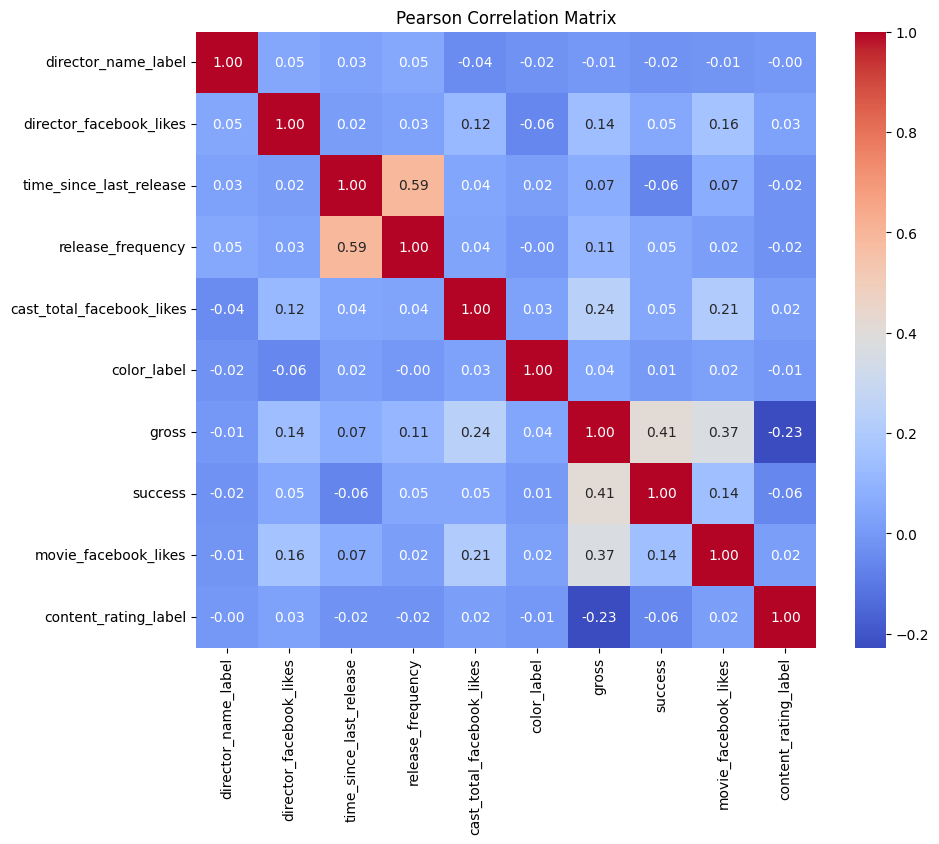

In [63]:

corr = data[features].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

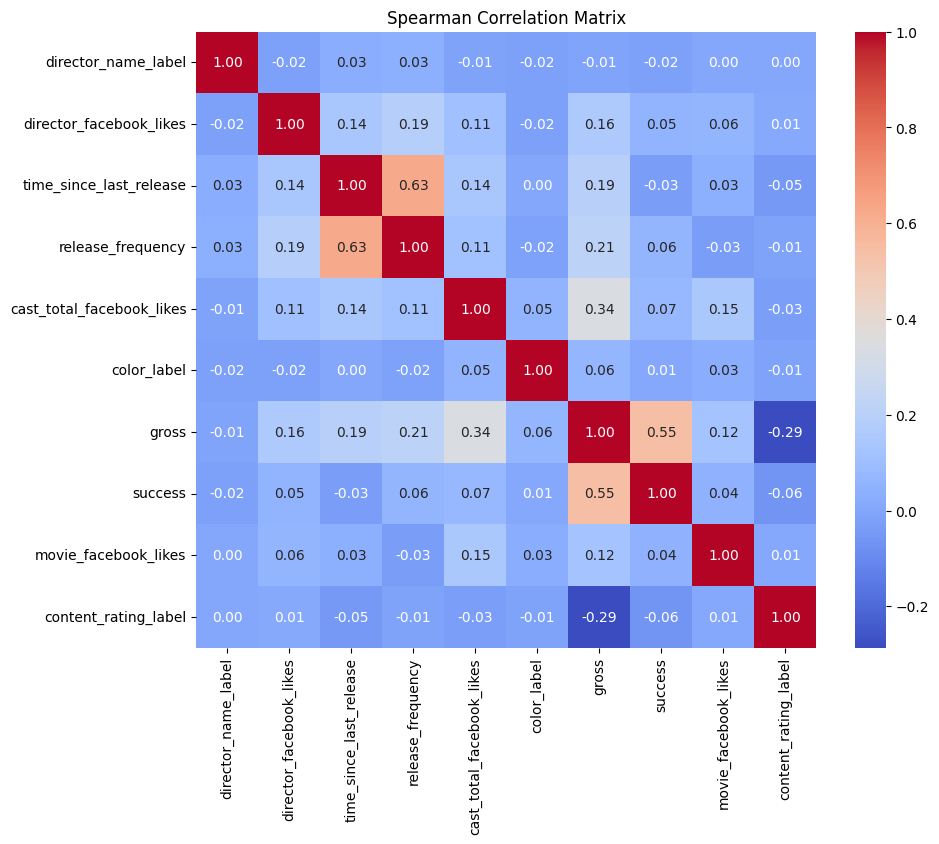

In [64]:

corr = data[features].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

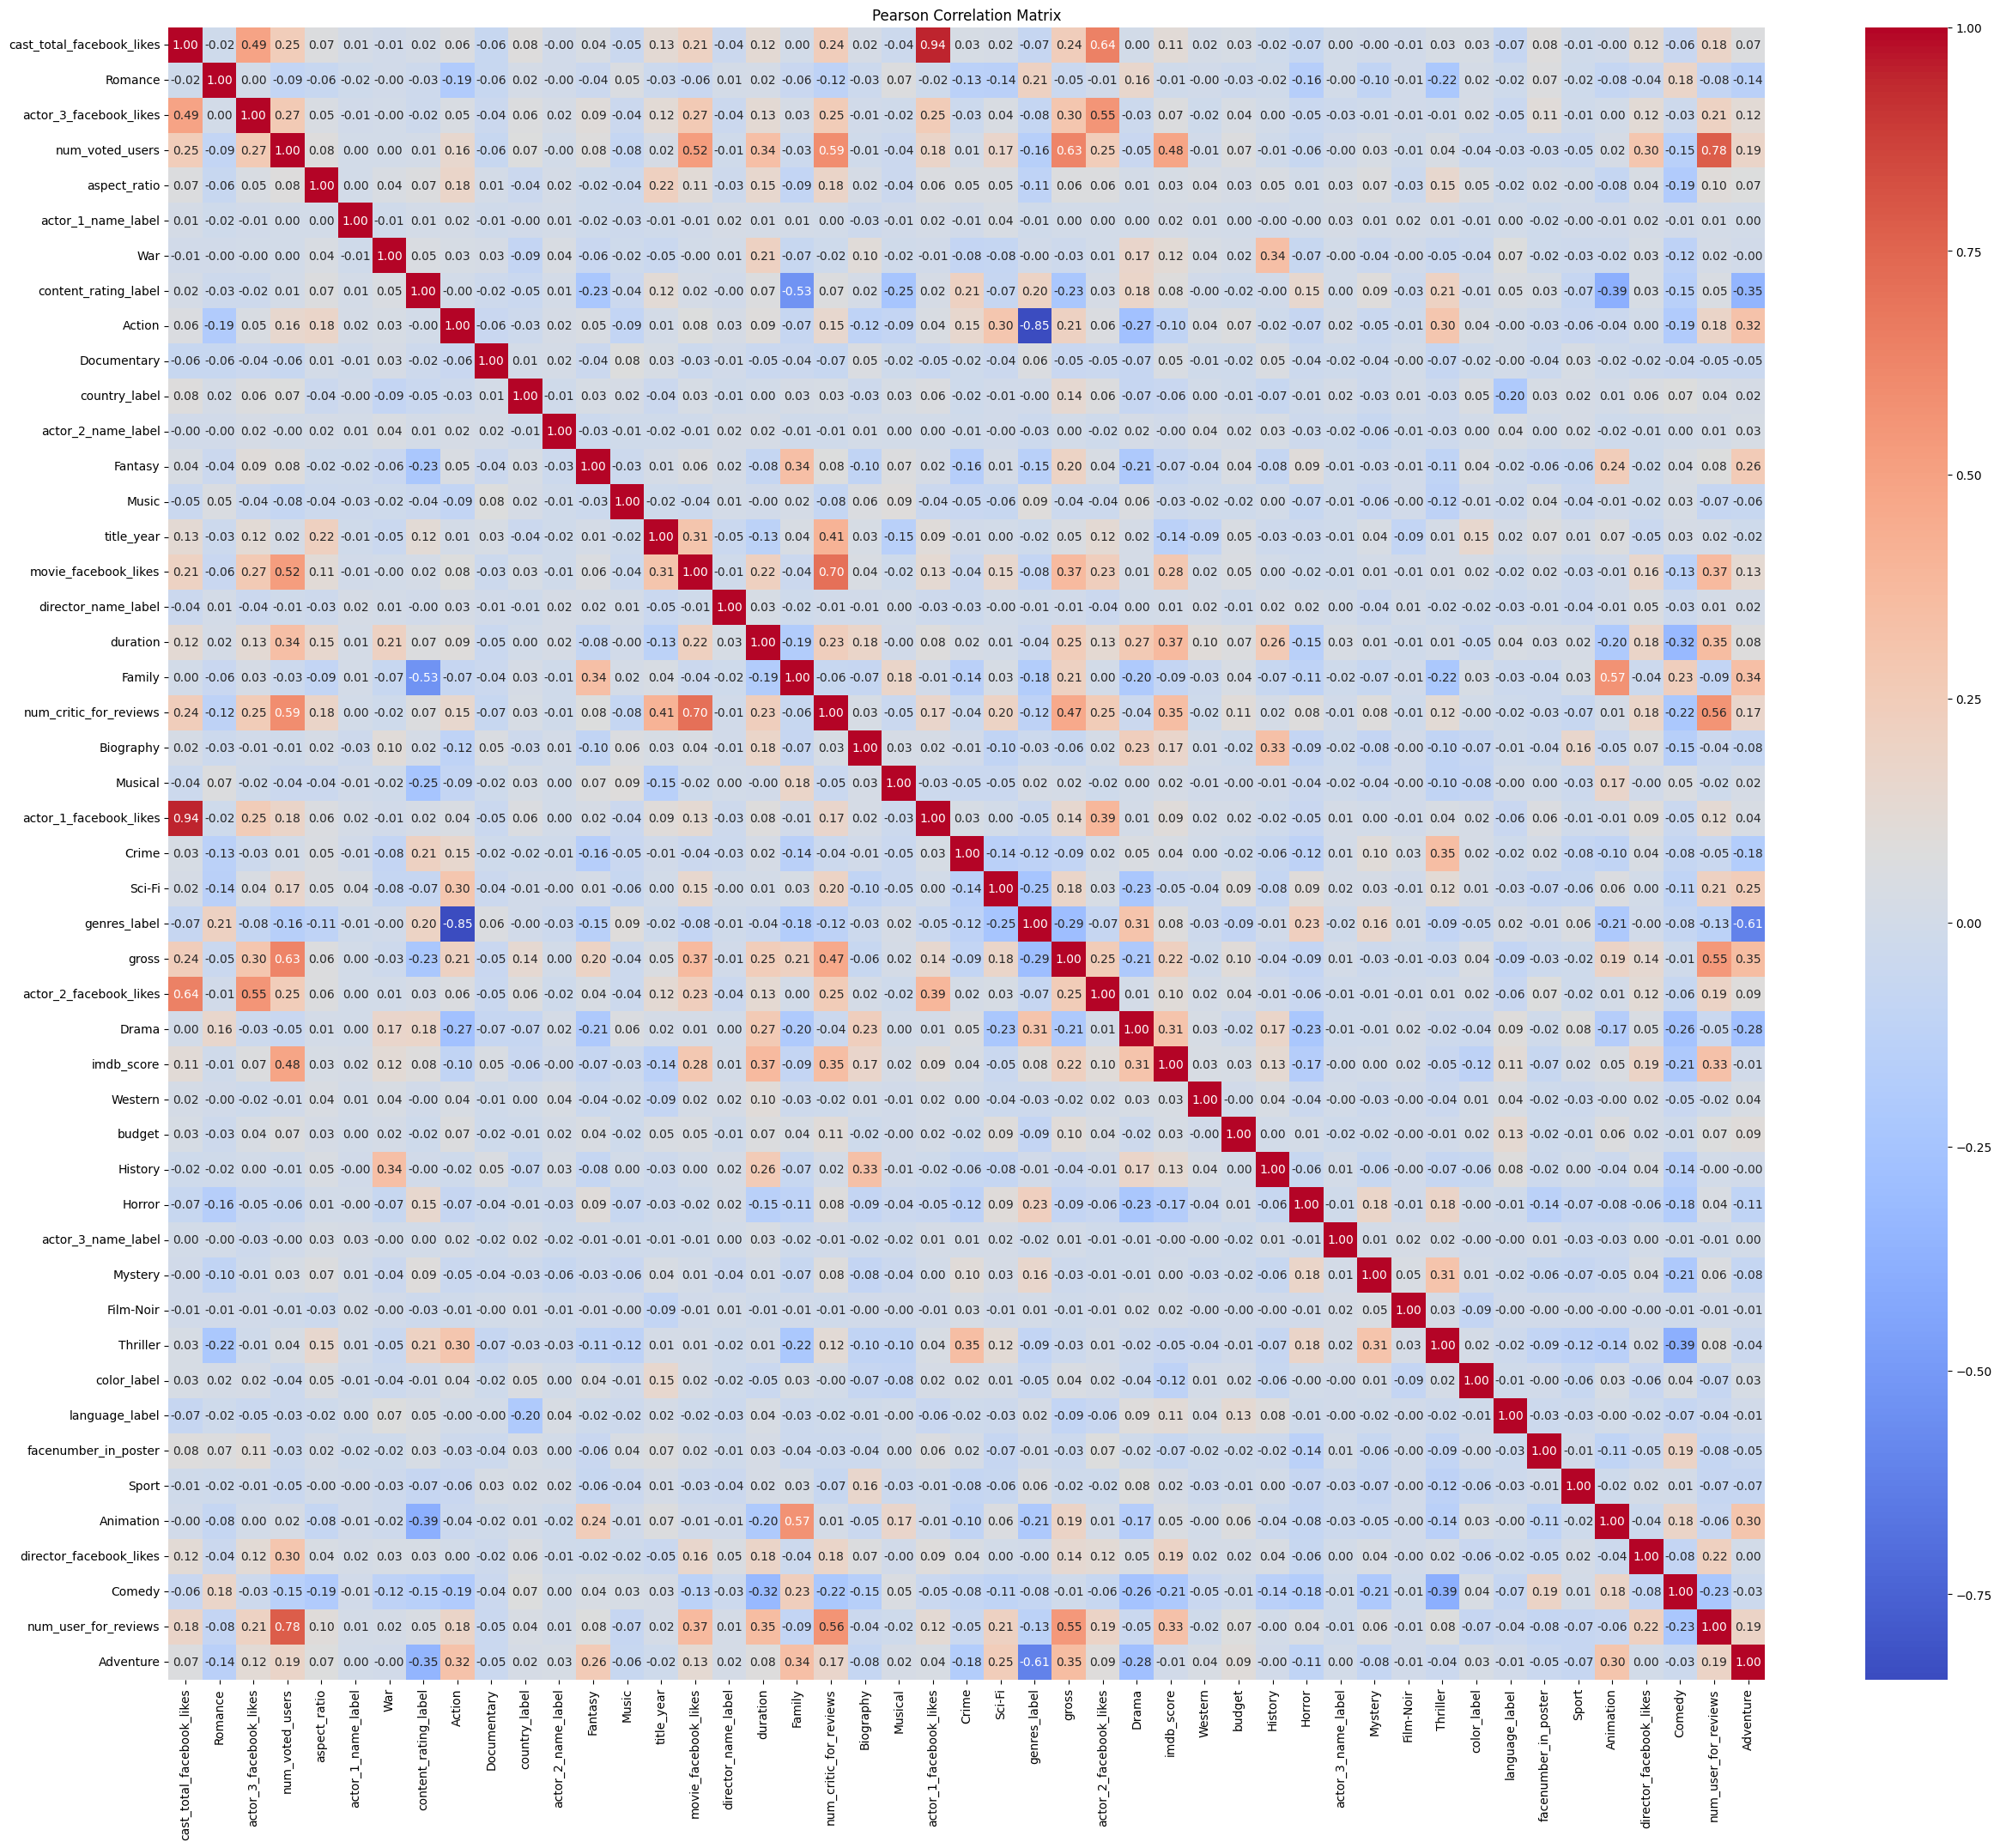

In [27]:

working_set = list(set(df.columns) - set(string_columns))
corr = df[working_set].corr(method='pearson')
plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

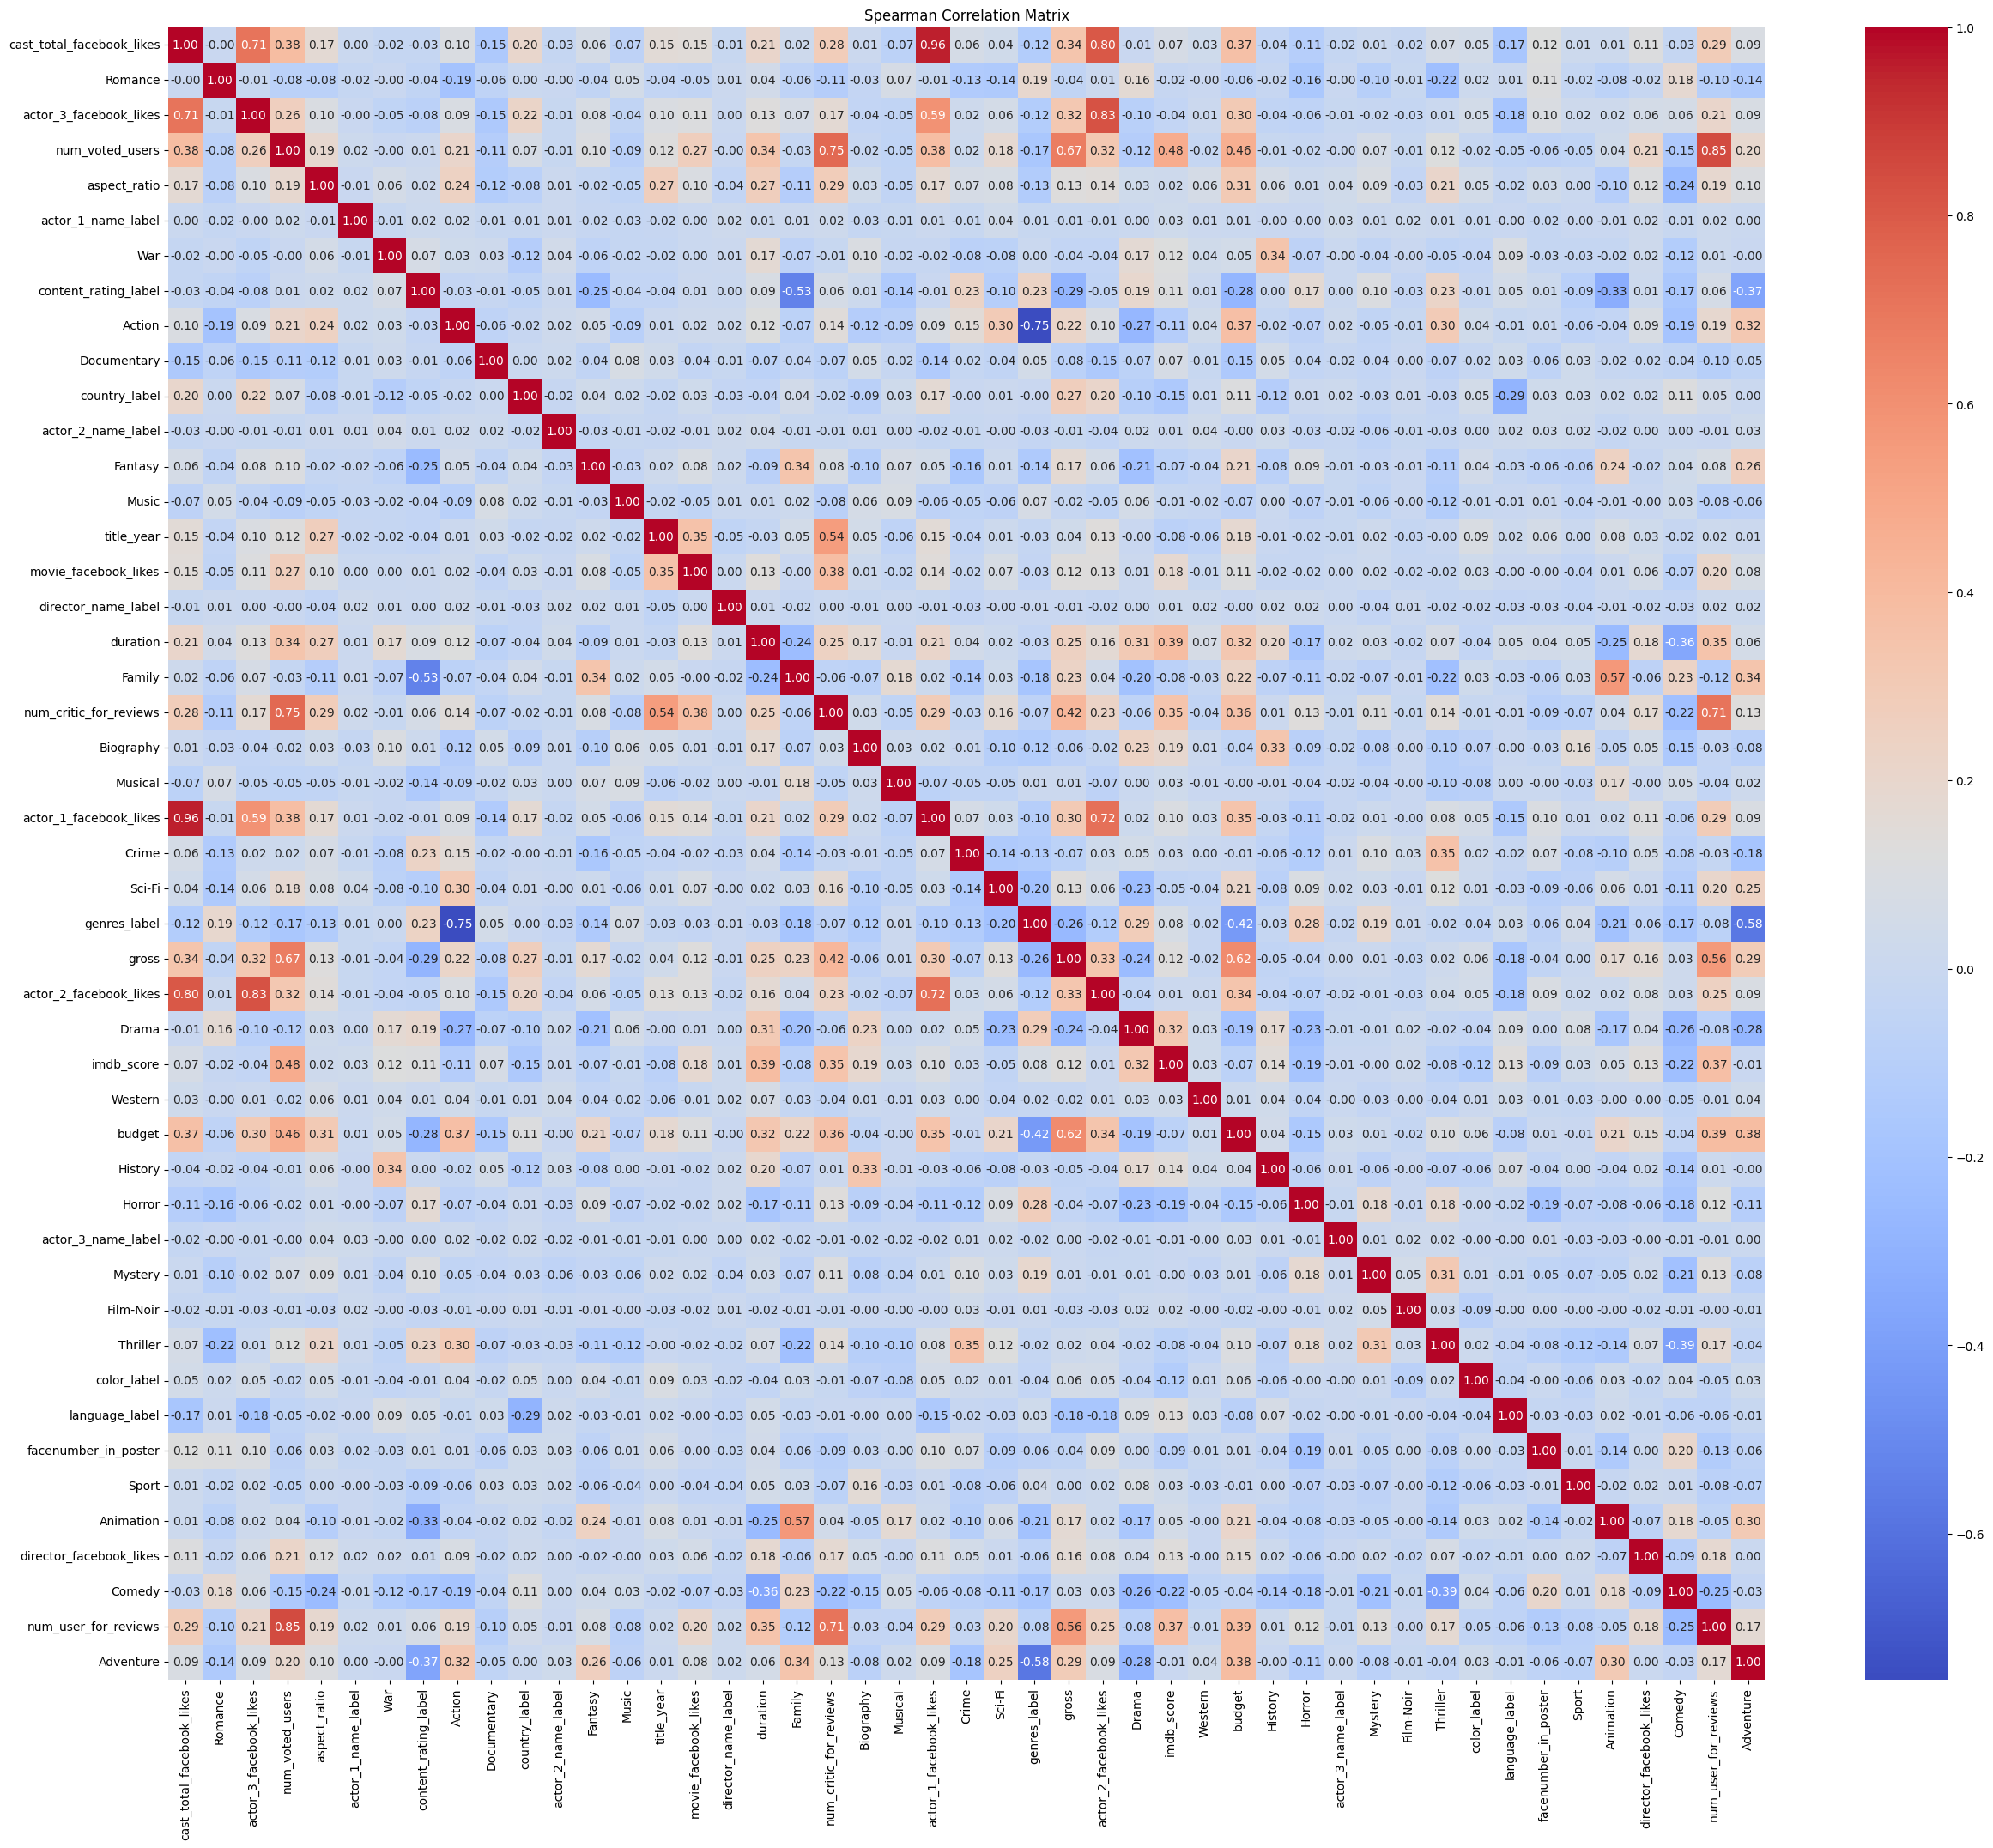

In [28]:

working_set = list(set(df.columns) - set(string_columns))
corr = df[working_set].corr(method='spearman')
plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

In [29]:

working_set = ['director_name_label', 'director_facebook_likes', 'title_year', "genres_label"] #+new_genre_columns


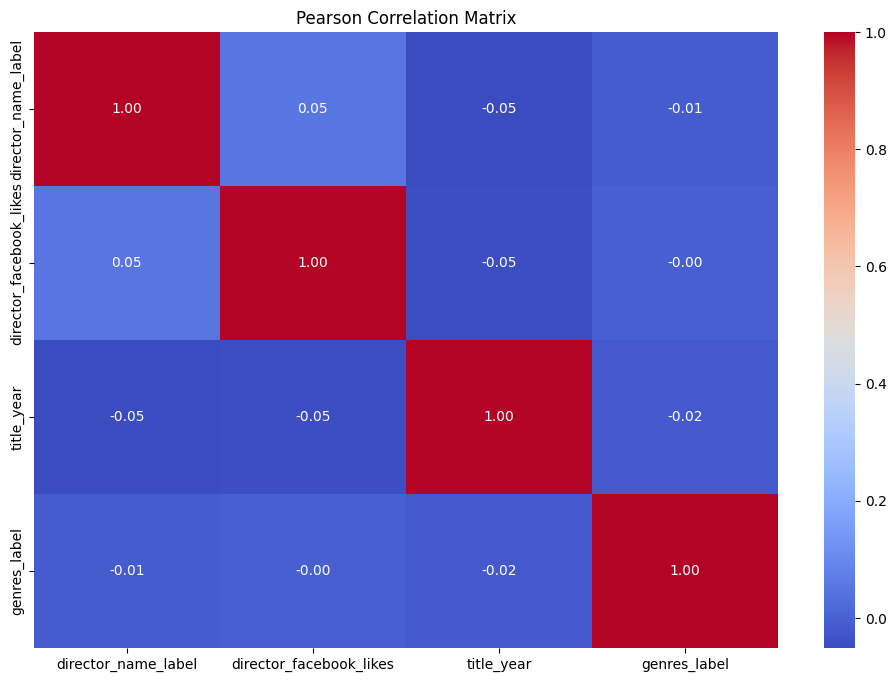

In [30]:
corr = df[working_set].corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

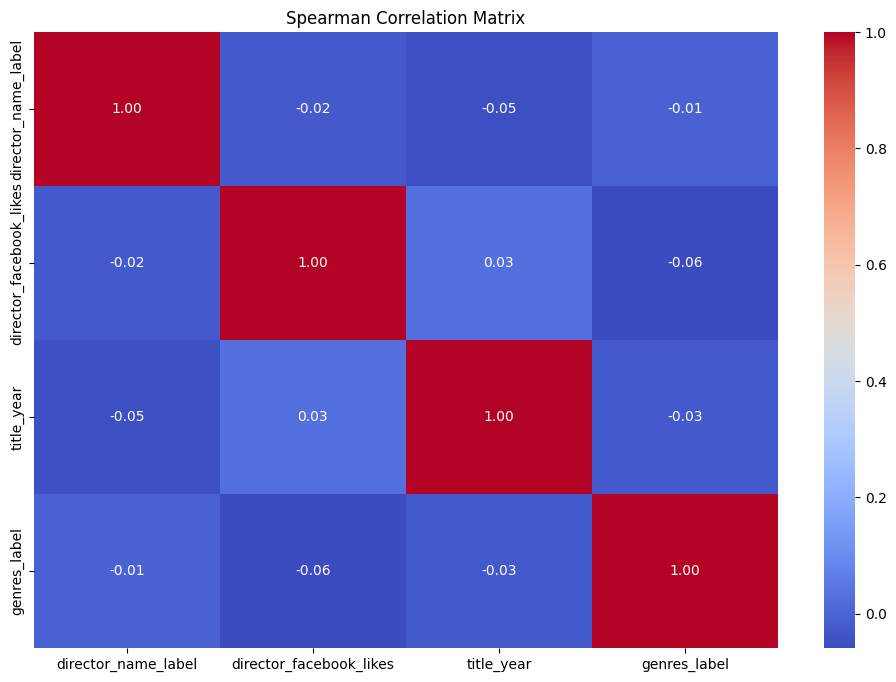

In [31]:

corr = df[working_set].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

In [52]:

working_set = ['director_name_label', 'title_year']+new_genre_columns


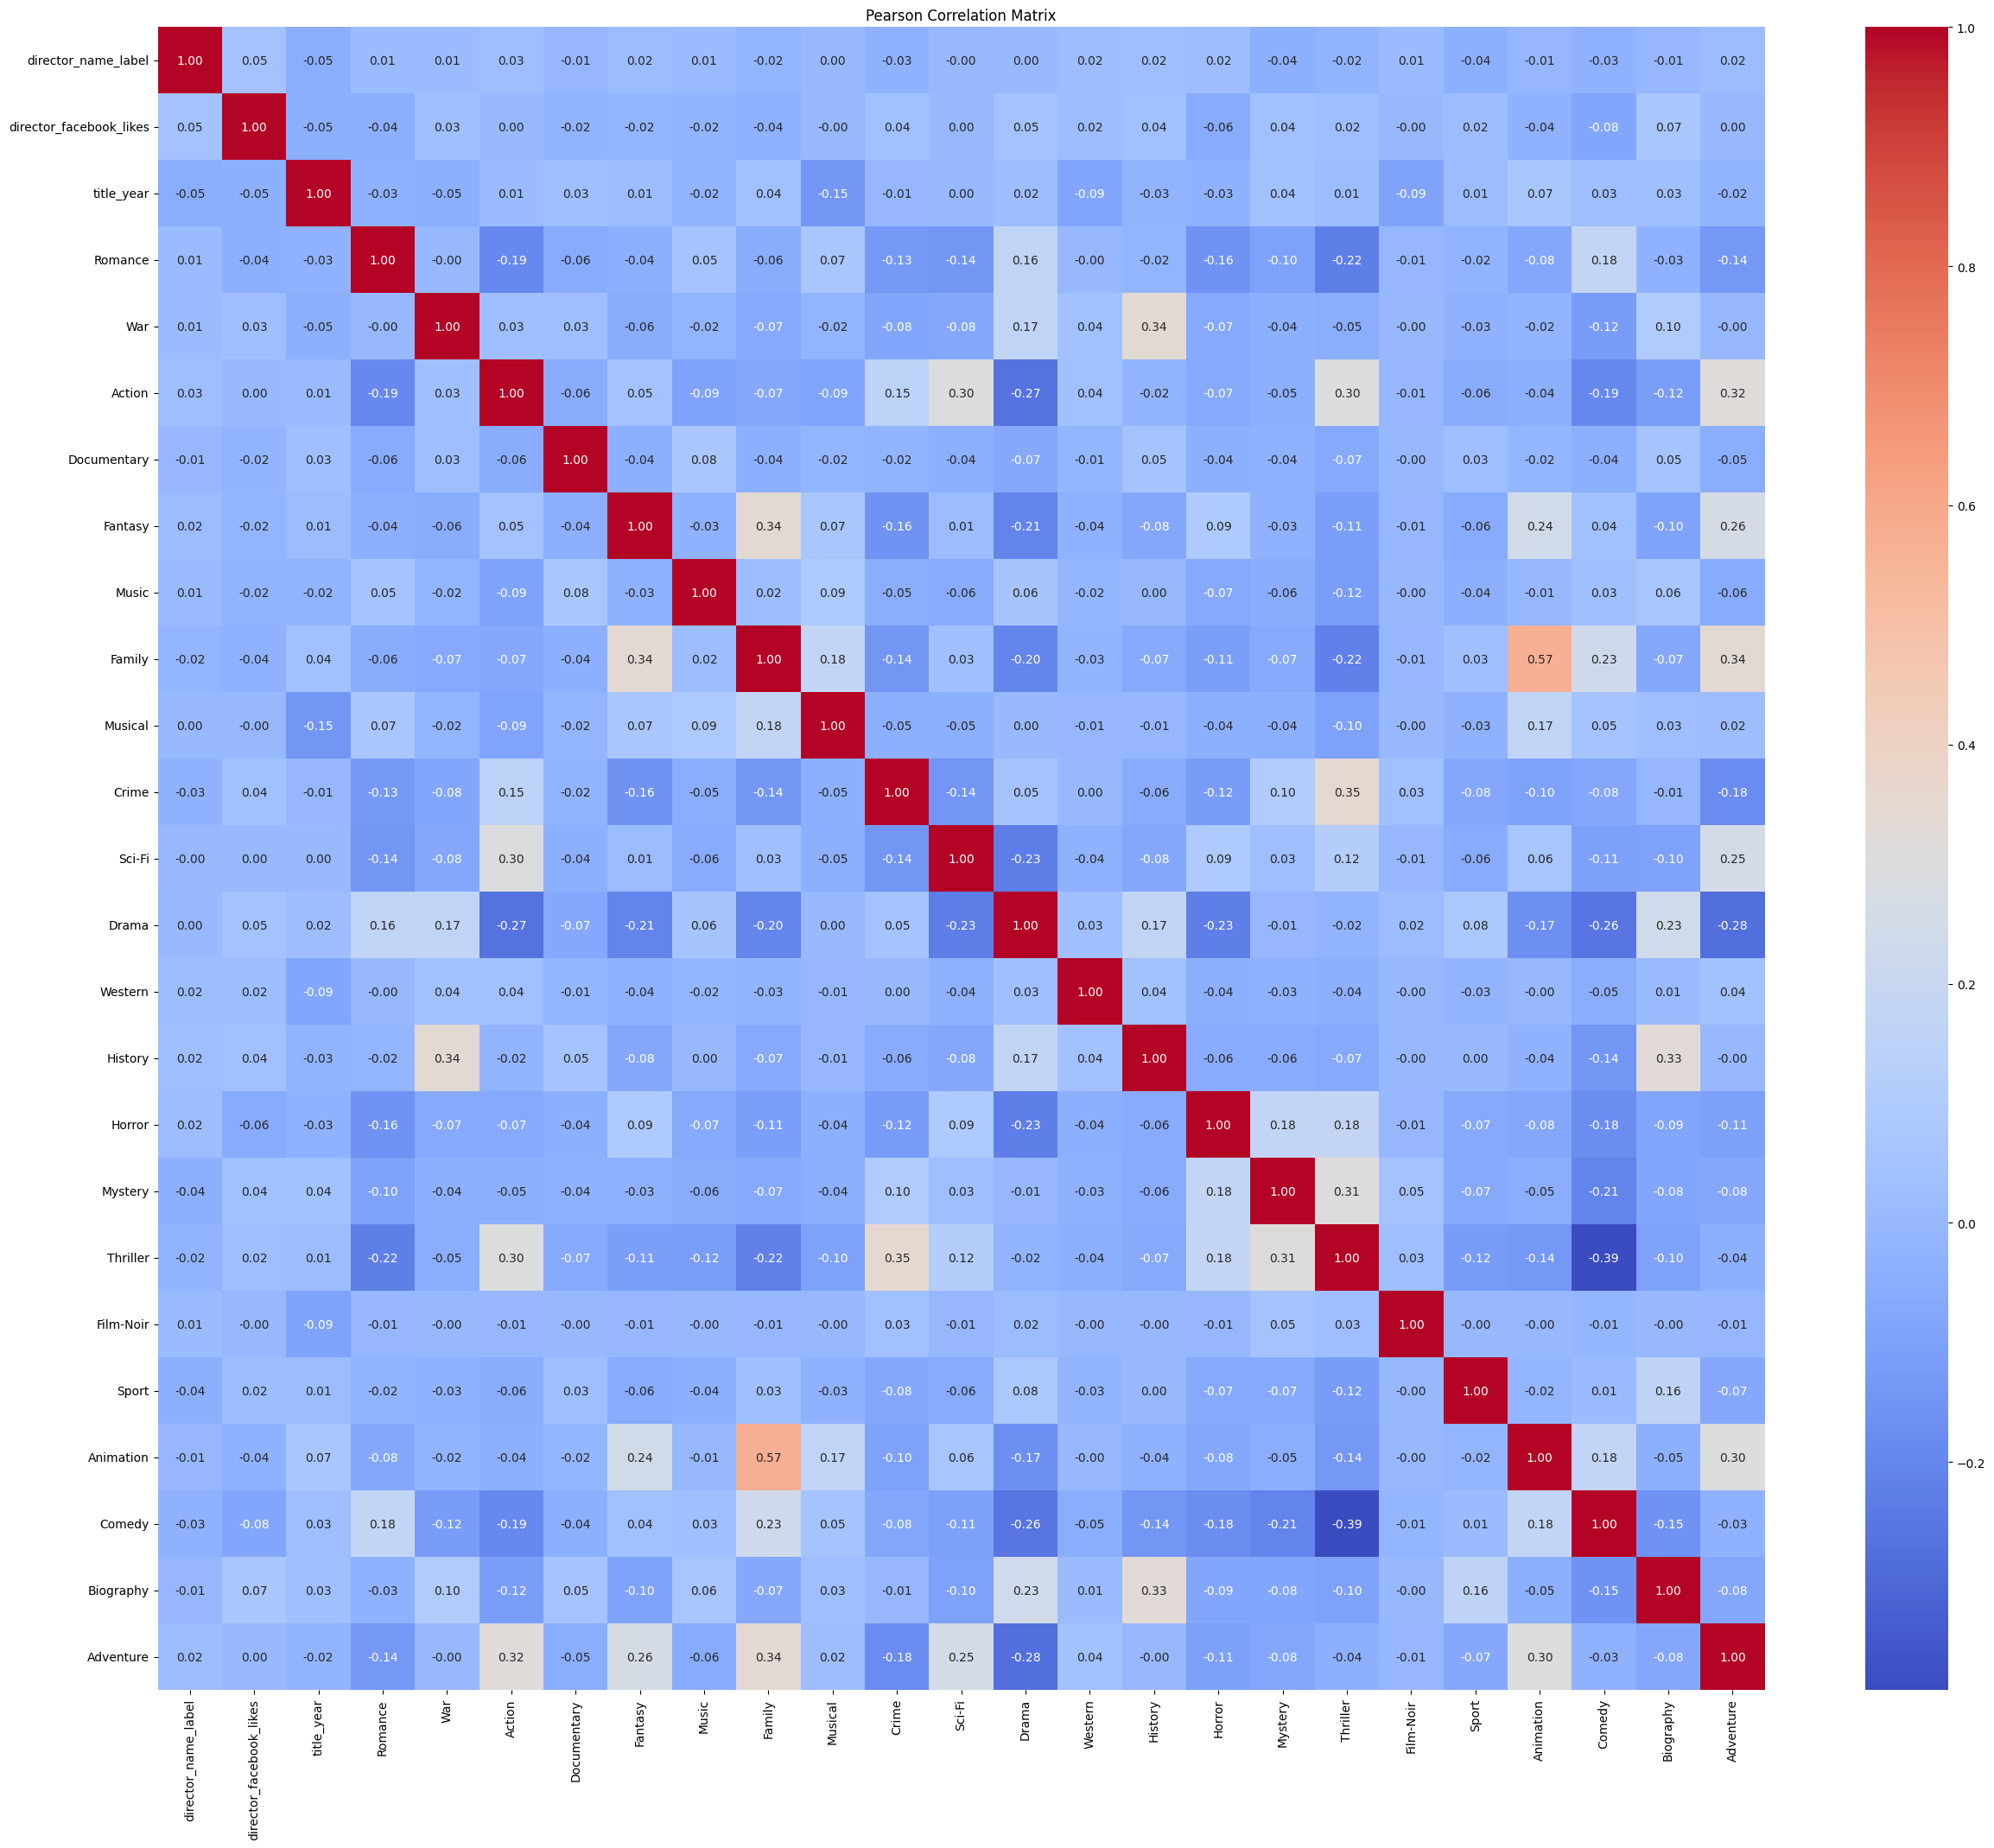

In [33]:
corr = df[working_set].corr(method='pearson')
plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

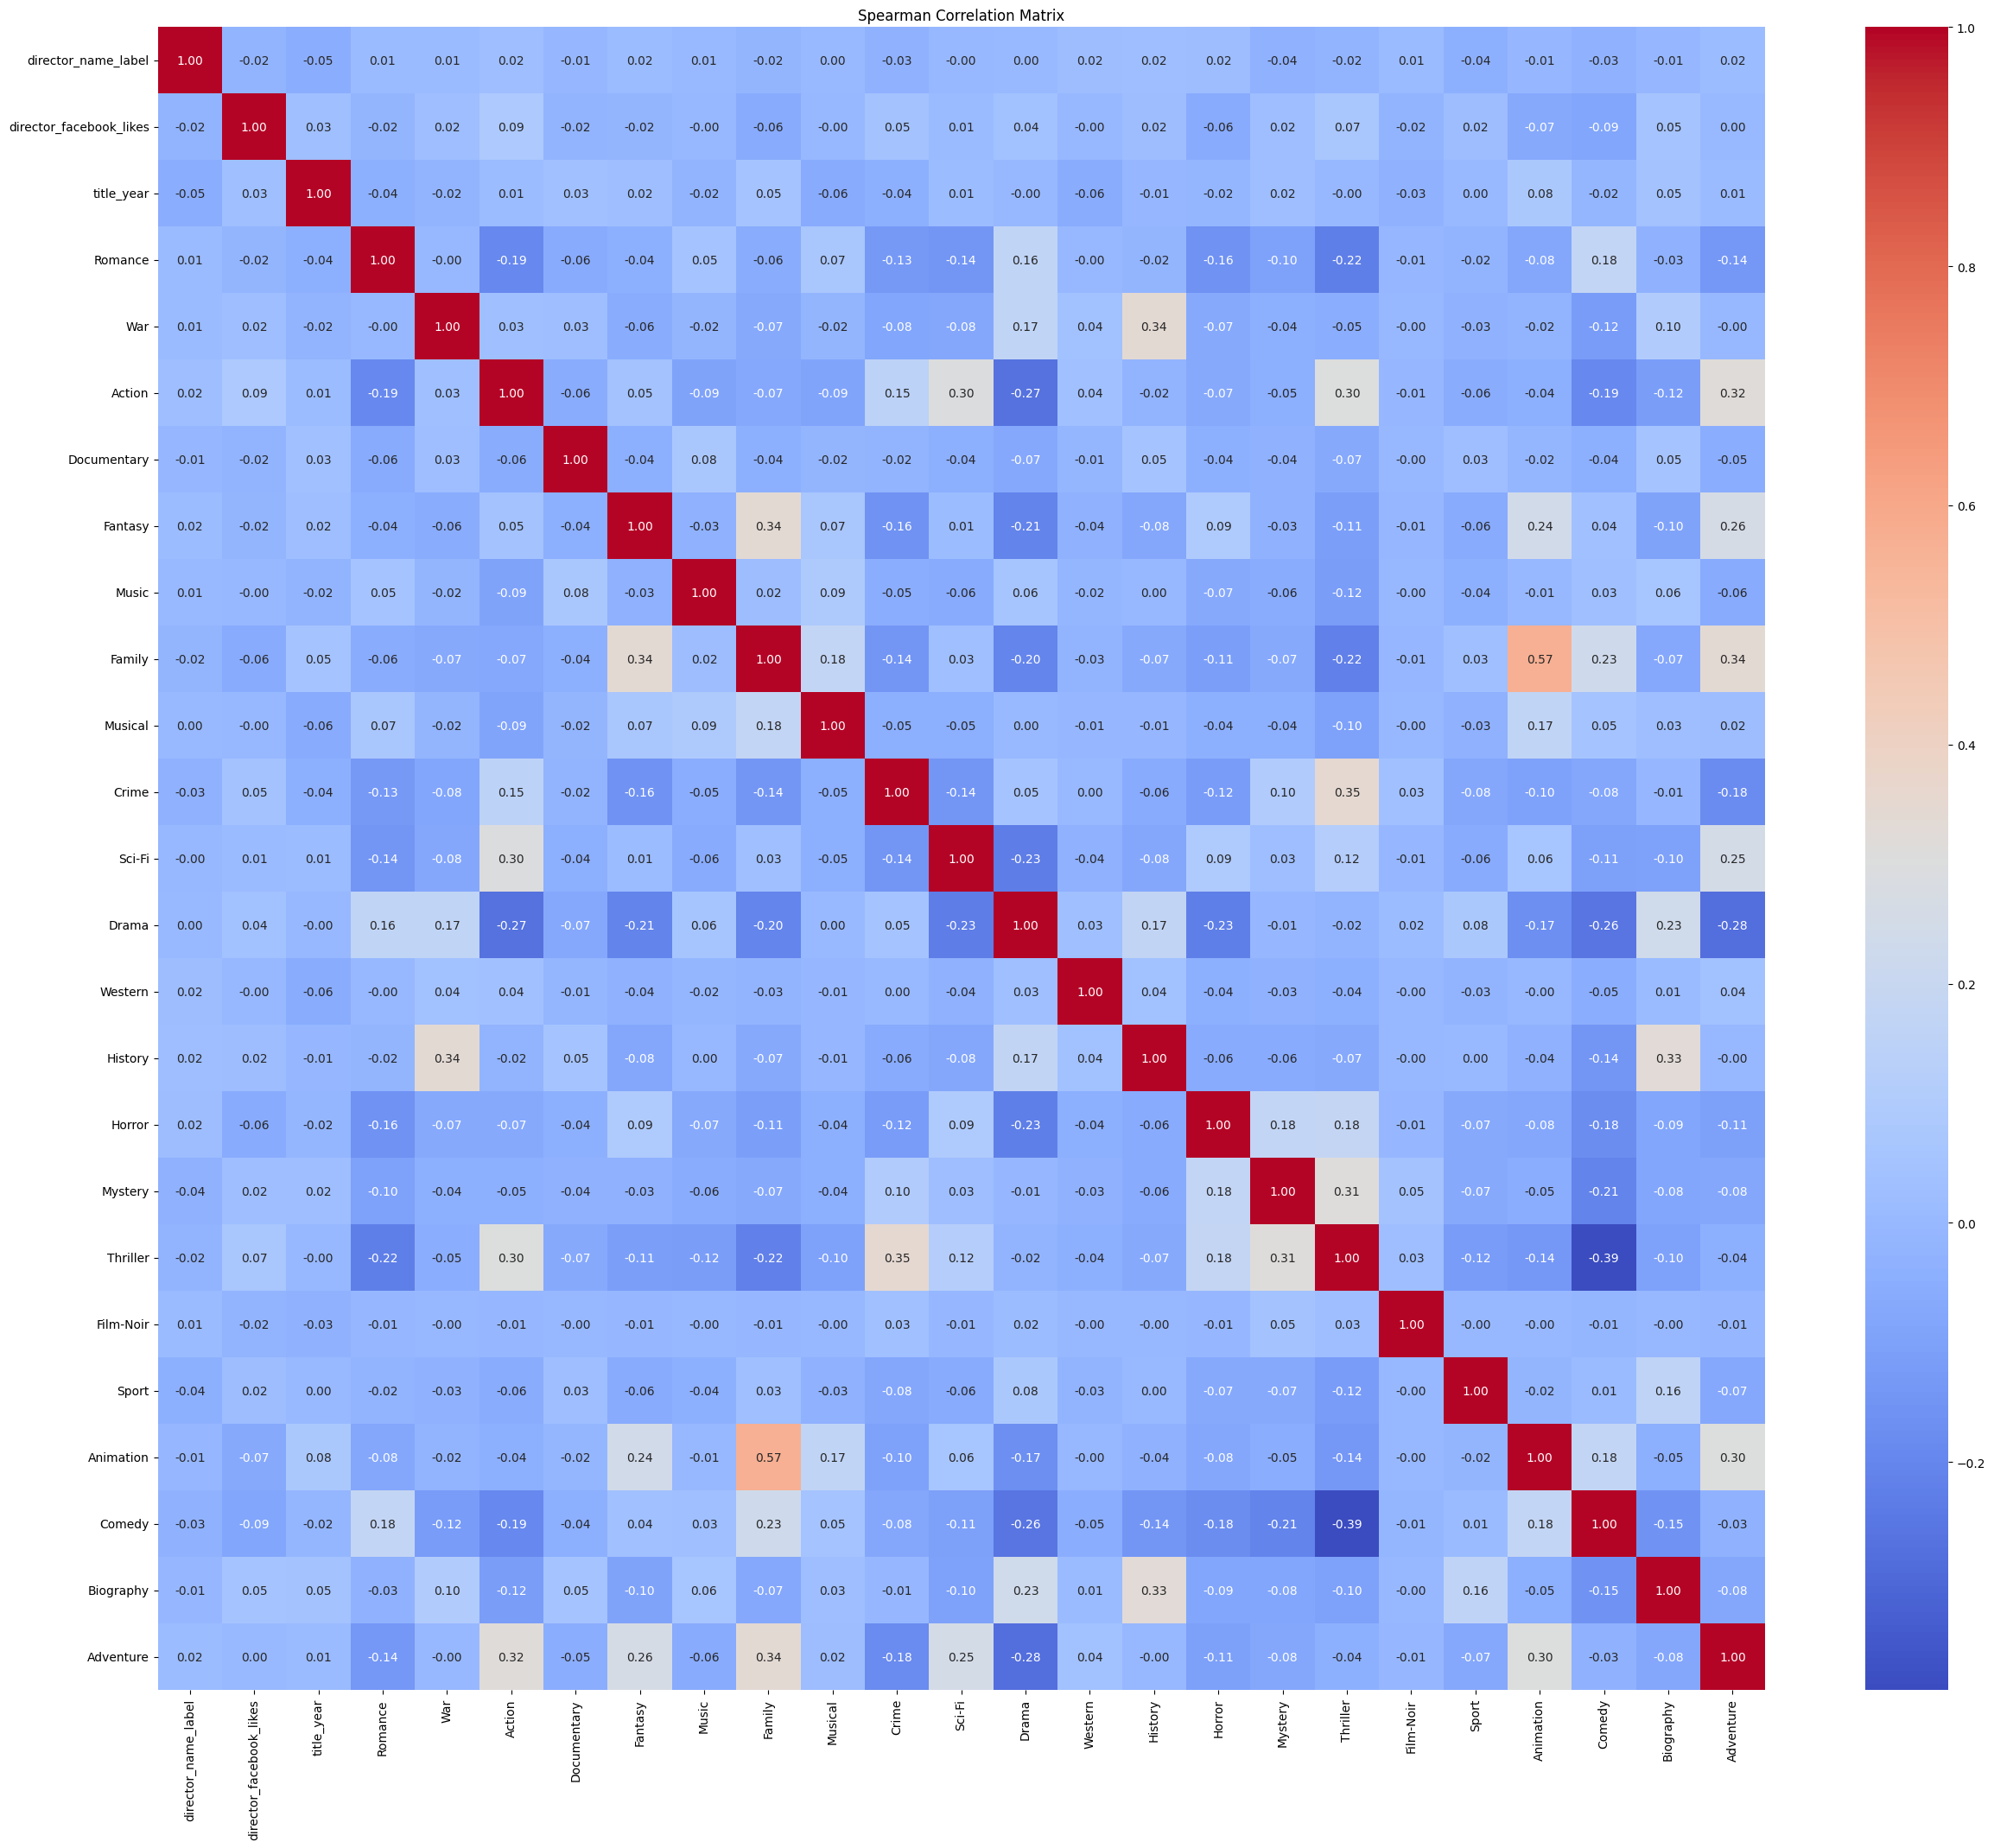

In [34]:

corr = df[working_set].corr(method='spearman')
plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

(1905.0, 2020.0)

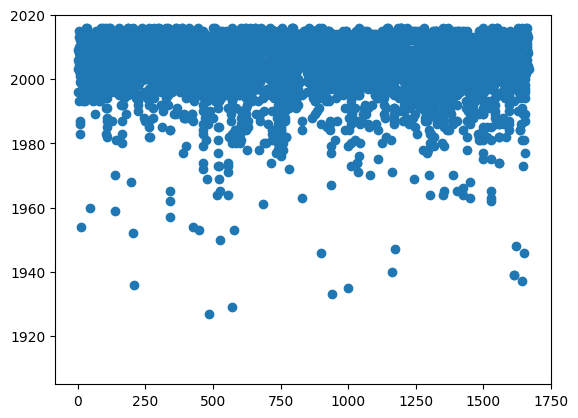

In [35]:
plt.scatter(df['director_name_label'], df['title_year'])
plt.ylim(1905, 2020)

(1950.0, 2022.0)

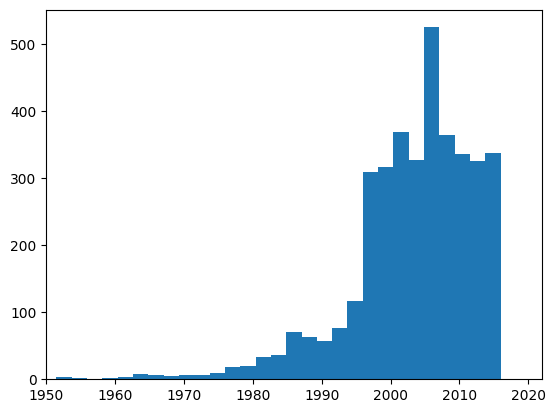

In [36]:
plt.hist([i for i in df['title_year'] if i >=0] , bins=40)
# plt.ylim(1905, 2020)
plt.xlim(1950, 2022)

(array([ 82.,  99.,  97., 100.,  90.,  74.,  91.,  79., 105.,  79.,  80.,
         95.,  90.,  86.,  84., 114.,  65., 104., 119.,  77.,  78.,  92.,
         84.,  76., 105.,  77.,  87.,  82.,  94., 111.,  97., 135., 134.,
         86., 110., 135.,  81., 102.,  81., 112.]),
 array([   0.   ,   41.675,   83.35 ,  125.025,  166.7  ,  208.375,
         250.05 ,  291.725,  333.4  ,  375.075,  416.75 ,  458.425,
         500.1  ,  541.775,  583.45 ,  625.125,  666.8  ,  708.475,
         750.15 ,  791.825,  833.5  ,  875.175,  916.85 ,  958.525,
        1000.2  , 1041.875, 1083.55 , 1125.225, 1166.9  , 1208.575,
        1250.25 , 1291.925, 1333.6  , 1375.275, 1416.95 , 1458.625,
        1500.3  , 1541.975, 1583.65 , 1625.325, 1667.   ]),
 <BarContainer object of 40 artists>)

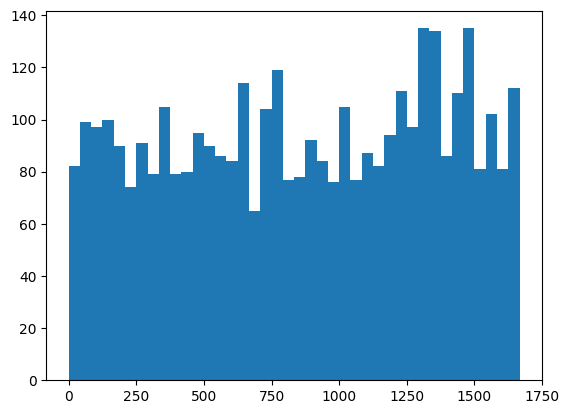

In [32]:
plt.hist([i for i in df['director_name_label'] if i >=0] , bins=40)
# plt.ylim(1905, 2020)
# plt.xlim(1950, 2022)

In [38]:
# X = df[["director_name_label", "director_facebook_likes"]]
X = df["director_name_label"]

# Y = df[working_set].drop(["director_name_label", "title_year"], axis = 1)
Y = df["title_year"]

In [35]:
X.head()

0     621
1     539
2    1401
3     251
5      62
Name: director_name_label, dtype: int64

In [41]:
X = np.array(X).reshape(-1, 1)

In [37]:
Y.head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
5    2012.0
Name: title_year, dtype: float64

In [42]:
Y = np.array(Y).reshape(-1, 1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error, confusion_matrix 
from sklearn import metrics

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

# X_train = X_train.reshape(1, -1)
# X_test = X_test.reshape(1, -1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3015, 1) (754, 1) (3015, 1) (754, 1)


In [44]:
lm =LinearRegression()
lm = lm.fit(X_train, Y_train)

train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))

RMSE_train= np.sqrt(mean_squared_error(Y_train, train_pred))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print('RSquared value on train:', lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  10.078954027982752
RMSE TestData =  9.014547586029806
--------------------------------------------------
RSquared value on train: 0.003306337108057722
RSquared value on test: -0.012485145529350872


In [45]:
error = abs(test_pred - Y_test)

In [46]:
mape = 100*(error/Y_test)

accuracy = 100 - np.mean(mape)
print(f"Accuracy = {accuracy}")

Accuracy = 99.66200286653695


In [57]:
# import pandas as pd

# Load the preprocessed data
# data = pd.read_csv('preprocessed_data.csv')

# Group movie years by director name
director_movie_years = df.groupby('director_name_label')['title_year'].apply(lambda x: sorted(x.unique())).to_dict()

print("Dictionary structure:")
print(director_movie_years)


Dictionary structure:
{0: [2009.0], 1: [2006.0], 2: [1996.0], 3: [2003.0], 4: [1993.0], 5: [2004.0, 2006.0, 2008.0, 2010.0, 2013.0, 2015.0], 6: [2005.0], 7: [1999.0], 8: [2001.0, 2002.0, 2003.0, 2005.0, 2007.0, 2008.0, 2012.0], 9: [1983.0, 1986.0, 1987.0, 2002.0], 10: [2007.0], 11: [2006.0], 12: [2009.0], 13: [2011.0], 14: [1954.0], 15: [2014.0], 16: [2012.0], 17: [1998.0], 18: [1993.0, 1997.0], 19: [1994.0], 20: [1996.0, 1999.0, 2003.0], 21: [2010.0], 22: [1999.0], 23: [1996.0], 24: [2013.0, 2015.0], 25: [1999.0], 26: [1993.0, 2001.0, 2010.0], 27: [2006.0], 28: [2001.0, 2004.0, 2009.0], 29: [2000.0, 2003.0, 2006.0, 2014.0, 2015.0], 30: [2006.0, 2015.0], 31: [2016.0], 32: [2012.0], 33: [2015.0], 34: [2007.0], 35: [2006.0, 2008.0, 2011.0], 36: [1994.0, 1998.0, 2004.0, 2009.0, 2016.0], 37: [2008.0], 38: [2002.0], 39: [1998.0], 40: [1999.0, 2002.0, 2004.0, 2011.0, 2013.0], 41: [2004.0], 42: [2003.0, 2006.0, 2008.0, 2010.0], 43: [2001.0, 2004.0, 2006.0, 2013.0], 44: [1960.0], 45: [1999.0],

In [67]:
lm.predict(np.array([42]).reshape(-1,1))

array([[2003.79644552]])

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, 0 to 5042
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3769 non-null   object 
 1   director_name              3769 non-null   object 
 2   num_critic_for_reviews     3769 non-null   float64
 3   duration                   3769 non-null   float64
 4   director_facebook_likes    3769 non-null   float64
 5   actor_3_facebook_likes     3769 non-null   float64
 6   actor_2_name               3769 non-null   object 
 7   actor_1_facebook_likes     3769 non-null   float64
 8   gross                      3769 non-null   float64
 9   genres                     3769 non-null   object 
 10  actor_1_name               3769 non-null   object 
 11  num_voted_users            3769 non-null   int64  
 12  cast_total_facebook_likes  3769 non-null   int64  
 13  actor_3_name               3769 non-null   object 
 1

In [275]:
working_set

['director_name_label',
 'title_year',
 'Romance',
 'War',
 'Action',
 'Documentary',
 'Fantasy',
 'Music',
 'Family',
 'Musical',
 'Crime',
 'Sci-Fi',
 'Drama',
 'Western',
 'History',
 'Horror',
 'Mystery',
 'Thriller',
 'Film-Noir',
 'Sport',
 'Animation',
 'Comedy',
 'Biography',
 'Adventure']

In [146]:
# X = df[["director_name_label", "director_facebook_likes"]]
X = np.array(df["director_name_label"]).reshape(-1, 1)
# X = df[working_set]
# X = df["director_name_label"]

# Y = df[working_set].drop("director_name_label", axis = 1)
Y = np.array(df[new_genre_columns])
# Y = np.array(df['genres_label']).reshape(-1, 1)
# Y = df[working_set]


In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

# X_train = X_train.reshape(-1, )
# X_test = X_test.reshape(-1, 1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3015, 1) (754, 1) (3015, 22) (754, 22)


In [148]:
lm =LinearRegression()
lm = lm.fit(X_train, Y_train)

train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))

RMSE_train= np.sqrt(mean_squared_error(Y_train, train_pred))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print('RSquared value on train:', lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  0.31627762058635206
RMSE TestData =  0.32089968882517916
--------------------------------------------------
RSquared value on train: 0.00043847269169081863
RSquared value on test: -0.0025279745381921663


In [292]:
l = lm.predict(np.array(2).reshape(-1, 1))
l.argmax(axis=1)
# ind = np.argpartition(l, -3)[-3:]
# new_genre_columns[ind]

array([10], dtype=int64)

In [282]:
list(processed_labels["director_name"].items())[256]

('Chuck Sheetz', 256)

In [281]:
new_genre_columns[10]

'Drama'

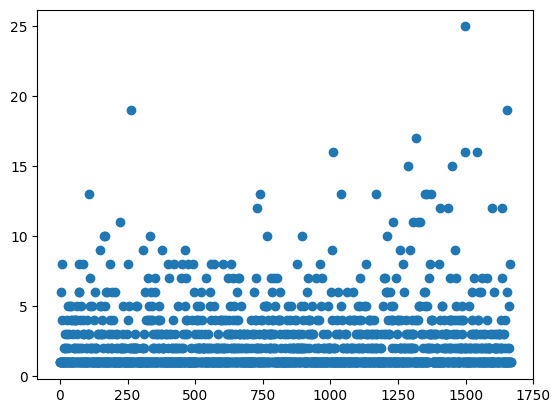

In [175]:
ls = df['director_name_label'].value_counts().sort_values(ascending=False)
plt.plot(ls.index, ls.values, "o")


In [307]:
df[new_genre_columns]

Romance  War  Action  Documentary  Fantasy  Music  Family  Musical  \
0           0    0       1            0        1      0       0        0   
1           0    0       1            0        1      0       0        0   
2           0    0       1            0        0      0       0        0   
3           0    0       1            0        0      0       0        0   
5           0    0       1            0        0      0       0        0   
...       ...  ...     ...          ...      ...    ...     ...      ...   
5026        1    0       0            0        0      1       0        0   
5027        0    0       0            0        0      0       0        0   
5033        0    0       0            0        0      0       0        0   
5035        1    0       1            0        0      0       0        0   
5042        0    0       0            1        0      0       0        0   

      Crime  Sci-Fi  ...  History  Horror  Mystery  Thriller  Film-Noir  \
0         0       1  ...        0       0        0         0          0   
1         0       0  ...        0       0        0         0          0   
2         0       0  ...        0       0        0         1          0   
3         0       0  ...        0       0        0         1          0   
5         0       1  ...        0       0        0         0          0   
...     ...     ...  ...      ...     ...      ...       ...        ...   
5026      0       0  ...        0       0        0         0          0   
5027      0       0  ...        0       0        0         0          0   
5033      0       1  ...        0       0        0         1          0   
5035      1       0  ...        0       0        0         1          0   
5042      0       0  ...        0       0        0         0          0   

      Sport  Animation  Comedy  Biography  Adventure  
0         0          0       0          0          1  
1         0          0       0          0          1  
2         0          0       0          0          1  
3         0          0       0          0          0  
5         0          0       0          0          1  
...     ...        ...     ...        ...        ...  
5026      0          0       0          0          0  
5027      0          0       0          0          0  
5033      0          0       0          0          0  
5035      0          0       0          0          0  
5042      0          0       0          0          0  

[3769 rows x 22 columns]

(array([4., 4., 2., 0., 3., 2., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 0., 1.]),
 array([1.00000e+00, 9.61500e+01, 1.91300e+02, 2.86450e+02, 3.81600e+02,
        4.76750e+02, 5.71900e+02, 6.67050e+02, 7.62200e+02, 8.57350e+02,
        9.52500e+02, 1.04765e+03, 1.14280e+03, 1.23795e+03, 1.33310e+03,
        1.42825e+03, 1.52340e+03, 1.61855e+03, 1.71370e+03, 1.80885e+03,
        1.90400e+03]),
 <BarContainer object of 20 artists>)

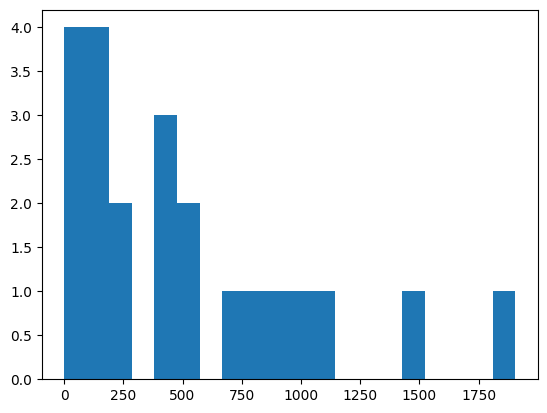

In [308]:
plt.hist(df[new_genre_columns].sum(), bins=20)

In [315]:
np.array(df[new_genre_columns].sum())

array([ 860,  153,  960,   46,  508,  151,  443,   96,  712,  496, 1904,
         60,  149,  392,  385, 1119,    1,  148,  196, 1462,  241,  781],
      dtype=int64)

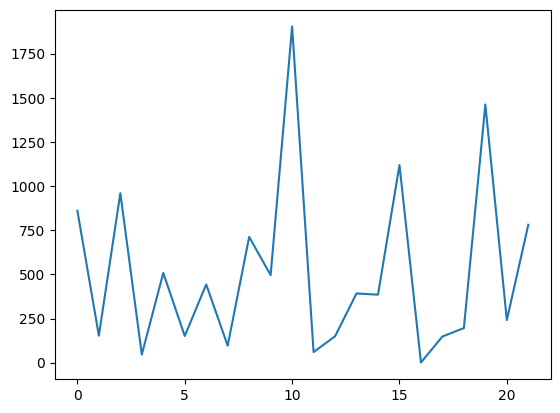

In [314]:
plt.plot(np.array(df[new_genre_columns].sum()))

In [317]:
genre_grouped = (df.groupby('title_year').sum())[new_genre_columns]

In [323]:
sorted(df['title_year'].unique())

[1927.0,
 1929.0,
 1933.0,
 1935.0,
 1936.0,
 1937.0,
 1939.0,
 1940.0,
 1946.0,
 1947.0,
 1948.0,
 1950.0,
 1952.0,
 1953.0,
 1954.0,
 1957.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

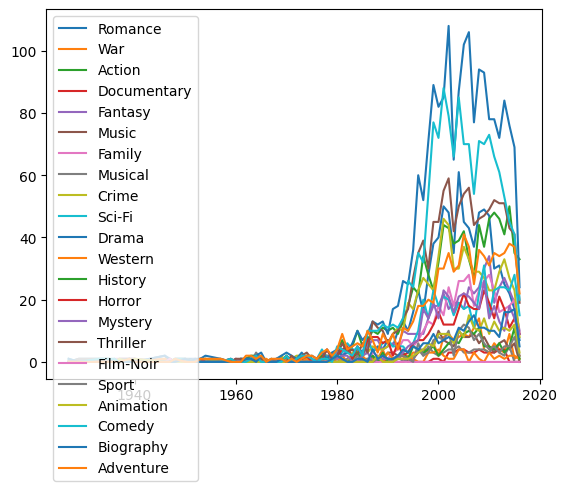

In [326]:
plt.plot(sorted(df['title_year'].unique()), genre_grouped, label = new_genre_columns)
plt.legend()

In [283]:
df[df['director_name_label'] == 256].count()

color                        1
director_name                1
num_critic_for_reviews       1
duration                     1
director_facebook_likes      1
actor_3_facebook_likes       1
actor_2_name                 1
actor_1_facebook_likes       1
gross                        1
genres                       1
actor_1_name                 1
num_voted_users              1
cast_total_facebook_likes    1
actor_3_name                 1
facenumber_in_poster         1
num_user_for_reviews         1
language                     1
country                      1
content_rating               1
budget                       1
title_year                   1
actor_2_facebook_likes       1
imdb_score                   1
aspect_ratio                 1
movie_facebook_likes         1
Action                       1
Adventure                    1
Animation                    1
Biography                    1
Comedy                       1
Crime                        1
Documentary                  1
Drama   

In [279]:
director_data = df[df['director_name_label'] == 255]
genre_sum = director_data.iloc[:, ].sum()

In [244]:
genre_sum[working_set]

director_name_label      1275
title_year             9979.0
Romance                     0
War                         0
Action                      4
Documentary                 0
Fantasy                     3
Music                       0
Family                      0
Musical                     0
Crime                       2
Sci-Fi                      0
Drama                       2
Western                     0
History                     0
Horror                      2
Mystery                     1
Thriller                    4
Film-Noir                   0
Sport                       0
Animation                   0
Comedy                      1
Biography                   0
Adventure                   1
dtype: object

In [178]:
genre_sum

num_critic_for_reviews                  99.0
duration                                85.0
director_facebook_likes                 64.0
actor_3_facebook_likes                 729.0
actor_2_name                  Carmen Electra
actor_1_facebook_likes                3000.0
gross                             48546578.0
genres                        Comedy|Romance
actor_1_name                 Alyson Hannigan
num_voted_users                        50415
cast_total_facebook_likes               6539
actor_3_name                    Fred Willard
facenumber_in_poster                     0.0
num_user_for_reviews                   613.0
language                             English
country                                  USA
content_rating                         PG-13
budget                            20000000.0
title_year                            2006.0
actor_2_facebook_likes                 869.0
imdb_score                               2.7
aspect_ratio                            1.85
movie_face

In [163]:
plt.plot(df.iloc([df["director_name_label"] == 2]) )

TypeError: unhashable type: 'list'

In [264]:
# creating a confusion matrix 
y_pred = (test_pred > 0.5) 
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1)) 

ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

AttributeError: 'DataFrame' object has no attribute 'argmax'

In [149]:
# error = abs(test_pred - Y_test)
# # print(error)
# mape = 100*(error/Y_test)

# accuracy = 100 - np.mean(mape)
print(f"Accuracy = {accuracy_score(Y_test, test_pred)}")

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

FOR 'director_name' AND 'title_year'

In [ ]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [47]:
!python -m pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 653.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/9.9 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.9 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.9 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------

DEPRECATION: Loading egg at e:\downloads\welearn\9th sem\ninesemenv\lib\site-packages\openprompt-1.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
# Group movie years by director name
director_movie_years = df.groupby('director_name_label')['title_year'].apply(lambda x: sorted(x.unique())).to_dict()

print("Dictionary structure:")
print(director_movie_years)


Dictionary structure:
{0: [2009.0], 1: [2006.0], 2: [1996.0], 3: [2003.0], 4: [1993.0], 5: [2004.0, 2006.0, 2008.0, 2010.0, 2013.0, 2015.0], 6: [2005.0], 7: [1999.0], 8: [2001.0, 2002.0, 2003.0, 2005.0, 2007.0, 2008.0, 2012.0], 9: [1983.0, 1986.0, 1987.0, 2002.0], 10: [2007.0], 11: [2006.0], 12: [2009.0], 13: [2011.0], 14: [1954.0], 15: [2014.0], 16: [2012.0], 17: [1998.0], 18: [1993.0, 1997.0], 19: [1994.0], 20: [1996.0, 1999.0, 2003.0], 21: [2010.0], 22: [1999.0], 23: [1996.0], 24: [2013.0, 2015.0], 25: [1999.0], 26: [1993.0, 2001.0, 2010.0], 27: [2006.0], 28: [2001.0, 2004.0, 2009.0], 29: [2000.0, 2003.0, 2006.0, 2014.0, 2015.0], 30: [2006.0, 2015.0], 31: [2016.0], 32: [2012.0], 33: [2015.0], 34: [2007.0], 35: [2006.0, 2008.0, 2011.0], 36: [1994.0, 1998.0, 2004.0, 2009.0, 2016.0], 37: [2008.0], 38: [2002.0], 39: [1998.0], 40: [1999.0, 2002.0, 2004.0, 2011.0, 2013.0], 41: [2004.0], 42: [2003.0, 2006.0, 2008.0, 2010.0], 43: [2001.0, 2004.0, 2006.0, 2013.0], 44: [1960.0], 45: [1999.0],

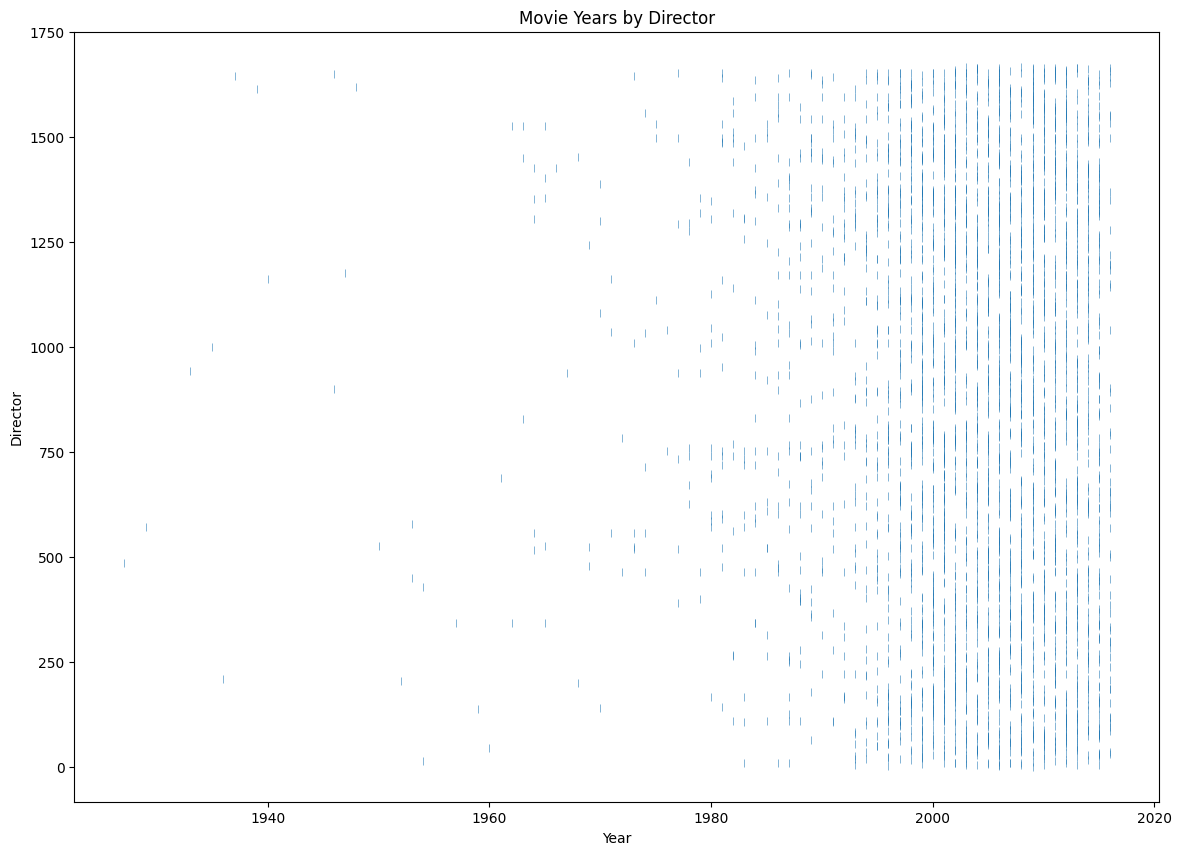

In [79]:
plot_data = pd.DataFrame([(director, year) for director, years in director_movie_years.items() for year in years], columns=['Director', 'Year'])

plt.figure(figsize=(14, 10))
sns.scatterplot(data=plot_data, x='Year', y='Director', marker='|', alpha=0.8)
plt.title('Movie Years by Director')
plt.xlabel('Year')
plt.ylabel('Director')
plt.show()

In [71]:
director_avg_year = df.groupby('director_name_label')['title_year'].mean().reset_index()

# Split data into features and target variable
# X = director_avg_year[['director_name']]
X = director_avg_year[['director_name_label']]
y = director_avg_year['title_year']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Prediction example
# director_name = 'Christopher Nolan'  # Replace with the director you want to predict for
director_name = 18
# director_avg_year[director_avg_year['director_name'] == director_name]  # Check average year
director_avg_year[director_avg_year['director_name_label'] == director_name]  # Check average year

next_movie_year = model.predict([[director_name]])
print("Predicted next movie year for", director_name, ":", next_movie_year)

Mean Squared Error: 122.3002121714478
Predicted next movie year for 18 : [2003.41910709]


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


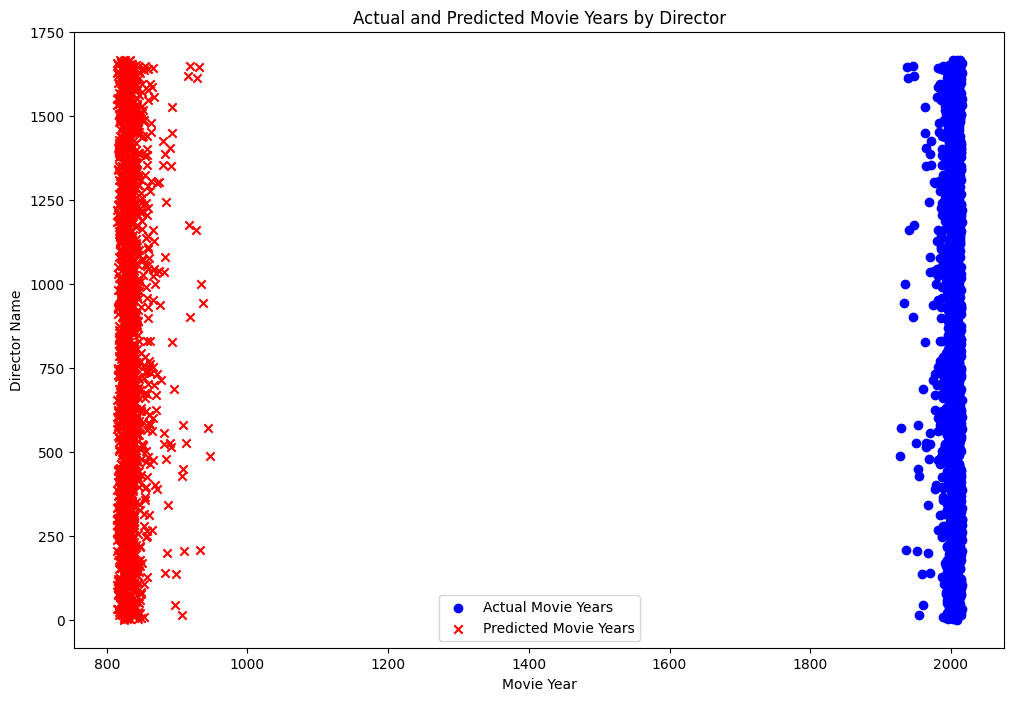

In [97]:
# from sklearn.linear_model import LinearRegression
# import pandas as pd
# import matplotlib.pyplot as plt

# Load the preprocessed data
# data = pd.read_csv('preprocessed_data.csv')
# 
# Assuming you have a DataFrame 'data' with columns 'director_name' and 'movie_year'
# Replace this with your actual data

# Feature Engineering
# Example: Calculate the average movie year for each director
director_avg_year = df.groupby('director_name_label')['title_year'].mean().reset_index()

# Initialize and train the model
model = LinearRegression()
# model.fit(director_avg_year[['title_year']], director_avg_year['director_name_label'])
model.fit(df[['title_year']], df['director_name_label'])

# Make predictions for all directors
director_avg_year['predicted_movie_year'] = model.predict(director_avg_year[['title_year']])

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(director_avg_year['title_year'], director_avg_year['director_name_label'], label='Actual Movie Years', color='blue')
plt.scatter(director_avg_year['predicted_movie_year'], director_avg_year['director_name_label'], label='Predicted Movie Years', color='red', marker='x')
plt.xlabel('Movie Year')
plt.ylabel('Director Name')
plt.title('Actual and Predicted Movie Years by Director')
plt.legend()
plt.show()


In [122]:
new_genre_columns

['Western',
 'Comedy',
 'Horror',
 'Biography',
 'Fantasy',
 'Action',
 'War',
 'Film-Noir',
 'Sci-Fi',
 'Crime',
 'History',
 'Drama',
 'Animation',
 'Mystery',
 'Thriller',
 'Documentary',
 'Adventure',
 'Music',
 'Musical',
 'Romance',
 'Family',
 'Sport']

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, 3497 to 3678
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   color                      3769 non-null   object        
 1   director_name              3769 non-null   object        
 2   num_critic_for_reviews     3769 non-null   float64       
 3   duration                   3769 non-null   float64       
 4   director_facebook_likes    3769 non-null   float64       
 5   actor_3_facebook_likes     3769 non-null   float64       
 6   actor_2_name               3769 non-null   object        
 7   actor_1_facebook_likes     3769 non-null   float64       
 8   gross                      3769 non-null   float64       
 9   genres                     3769 non-null   object        
 10  actor_1_name               3769 non-null   object        
 11  num_voted_users            3769 non-null   int64         
 12  cast_tot

In [137]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [229]:
target = new_genre_columns

data_with_genre = df[features + new_genre_columns + ['title_year']].copy()

In [230]:
data_with_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, 3497 to 3678
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name_label        3769 non-null   int64  
 1   director_facebook_likes    3769 non-null   float64
 2   time_since_last_release    3769 non-null   float64
 3   release_frequency          3769 non-null   float64
 4   cast_total_facebook_likes  3769 non-null   int64  
 5   color_label                3769 non-null   int64  
 6   gross                      3769 non-null   float64
 7   success                    3769 non-null   int32  
 8   movie_facebook_likes       3769 non-null   int64  
 9   content_rating_label       3769 non-null   int64  
 10  Western                    3769 non-null   int64  
 11  Comedy                     3769 non-null   int64  
 12  Horror                     3769 non-null   int64  
 13  Biography                  3769 non-null   int64  

In [231]:
X_genre = data_with_genre[features + ['title_year']]
y_genre = data_with_genre[target]

In [232]:
# Split the data into training and testing sets
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X_genre, y_genre, test_size=0.3, random_state=42)


In [234]:

# Train a multi-label classification model
multi_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=1000,
                                                             max_depth=20,
                                                            random_state=42),
                                                            n_jobs=8)
multi_model.fit(X_train_genre, y_train_genre)

# Evaluate the model
accuracy = multi_model.score(X_test_genre, y_test_genre)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.07869142351900972


In [235]:
# Evaluate the model
accuracy = multi_model.score(X_test_genre, y_test_genre)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.07869142351900972


In [236]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [237]:

# Predict labels for the test set
y_pred_genre = multi_model.predict(X_test_genre)

In [238]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test_genre, y_pred_genre, average='weighted')
recall = recall_score(y_test_genre, y_pred_genre, average='weighted')
f1 = f1_score(y_test_genre, y_pred_genre, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6512509664516158
Recall: 0.3076241134751773
F1 Score: 0.3639302093743225


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
# Predict the genre(s) of the next movie for a given director
def predict_next_movie_genres(director_features, model):
    # director_features should contain features for the director (e.g., name, Facebook likes, time since last release, etc.)
    predicted_genres = model.predict([director_features])
    return predicted_genres[0]  # Extract the predicted genre labels for the next movie(s)


In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, 3497 to 3678
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name_label        3769 non-null   int64  
 1   director_facebook_likes    3769 non-null   float64
 2   time_since_last_release    3769 non-null   float64
 3   release_frequency          3769 non-null   float64
 4   cast_total_facebook_likes  3769 non-null   int64  
 5   color_label                3769 non-null   int64  
 6   gross                      3769 non-null   float64
 7   success                    3769 non-null   int32  
 8   movie_facebook_likes       3769 non-null   int64  
 9   content_rating_label       3769 non-null   int64  
dtypes: float64(4), int32(1), int64(5)
memory usage: 309.2 KB


In [242]:
def convert_labels_to_genres(predicted_labels, genre_list):
    predicted_genres = []
    for i, label in enumerate(predicted_labels):
        if label == 1:
            predicted_genres.append(genre_list[i])
    return predicted_genres

def predict_next_movie_genre(director_name, model, model_for_year, df, verbose = False):
    # Extract additional features from the DataFrame
    director_data = df[df['director_name_label'] == director_name]
    if director_data.empty:
        print("Director not found in the dataset.")
        return None
    current_year = datetime.now().year
    last_movie_year = director_data['title_year'].max()
    time_since_last_release = current_year - last_movie_year if not pd.isnull(last_movie_year) else 0
    director_facebook_likes = director_data['director_facebook_likes'].max()
    release_frequency = director_data['release_frequency'].max()
    
    # Extract last movie's success and content rating label
    last_movie = director_data.iloc[-1]
    last_movie_color = last_movie['color_label']
    success = last_movie['success']
    # content_rating_label = last_movie['content_rating_label']
    content_rating_label = director_data['content_rating_label'].value_counts().max()

    
    # You can extract other features similarly
    
    # Create a dictionary containing the extracted features
    features = {
        'director_name_label': director_name,
        'director_facebook_likes': director_facebook_likes,
        'time_since_last_release': time_since_last_release,
        'release_frequency': release_frequency,
        'cast_total_facebook_likes': last_movie['cast_total_facebook_likes'],
        'color_label': last_movie_color,
        'gross': last_movie['gross'],
        'success': success,
        'movie_facebook_likes': last_movie['movie_facebook_likes'],
        'content_rating_label': content_rating_label
    }
    next_movie_year = round(model_for_year.predict([list(features.values())])[0])
    features['title_year'] = next_movie_year
    if verbose:
        print("Passed features - \n", features)
    
    # Predict next movie year using the provided model
    # next_movie_features = [features]
    # next_movie_features = np.array(list(features.values())).reshape(-1,1)
    next_movie_features = [list(features.values())]

    next_movie_genre = model.predict(next_movie_features)
    
    return next_movie_genre[0]


In [156]:
director_name = 220
predicted_genres = convert_labels_to_genres(predict_next_movie_genre(director_name, model, df = df, verbose = 1), new_genre_columns)
print("Predicted Genres for the Next Movie(s):", predicted_genres)

Passed features - 
 {'director_name_label': 220, 'director_facebook_likes': 28.0, 'time_since_last_release': 12.0, 'release_frequency': 12.0, 'cast_total_facebook_likes': 13597, 'color_label': 1, 'gross': 55994557.0, 'success': 0, 'movie_facebook_likes': 12000, 'content_rating_label': 1}
Predicted Genres for the Next Movie(s): ['Comedy', 'Fantasy', 'Animation', 'Adventure', 'Family']


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  

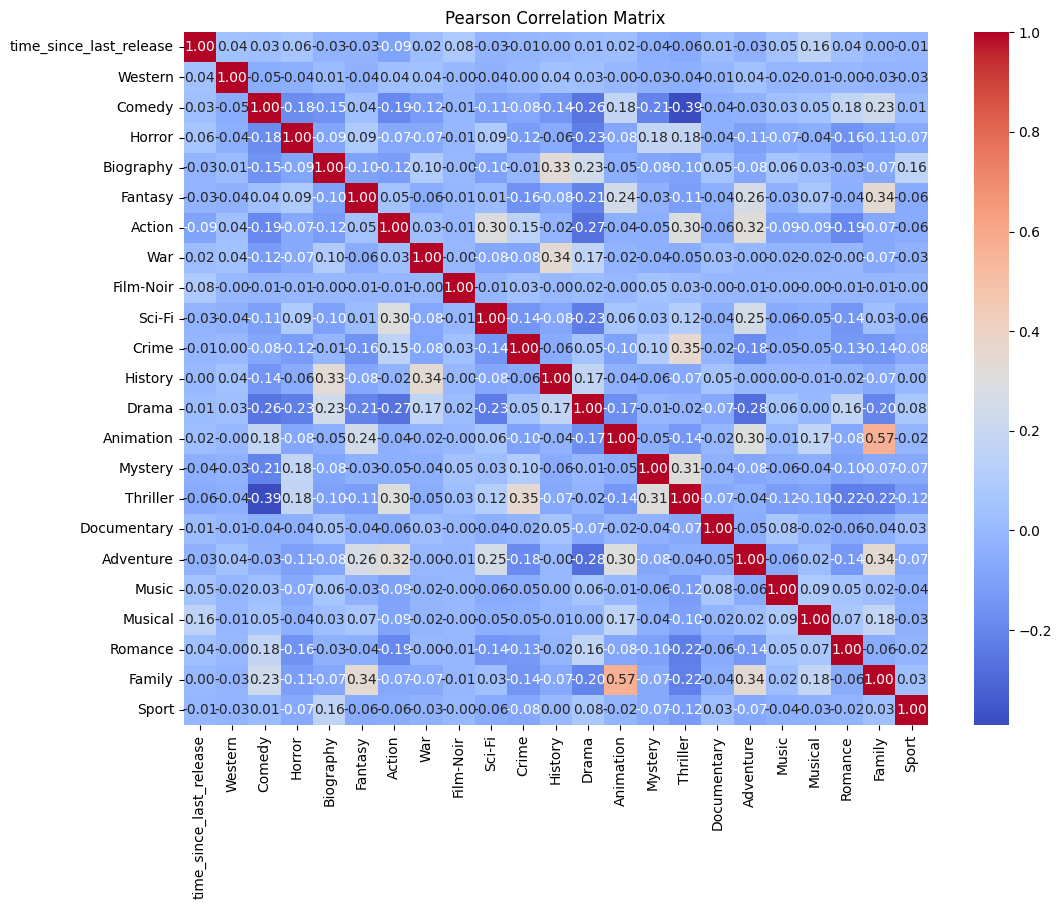

In [177]:
corr = df[[features[2]]+new_genre_columns].corr(method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

In [178]:
from sklearn.ensemble import AdaBoostClassifier

In [194]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2638 entries, 1853 to 2675
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name_label        2638 non-null   int64  
 1   director_facebook_likes    2638 non-null   float64
 2   time_since_last_release    2638 non-null   float64
 3   release_frequency          2638 non-null   float64
 4   cast_total_facebook_likes  2638 non-null   int64  
 5   color_label                2638 non-null   int64  
 6   gross                      2638 non-null   float64
 7   success                    2638 non-null   int32  
 8   movie_facebook_likes       2638 non-null   int64  
 9   content_rating_label       2638 non-null   int64  
 10  title_year                 2638 non-null   float64
dtypes: float64(5), int32(1), int64(5)
memory usage: 237.0 KB


In [260]:
inner = AdaBoostClassifier(n_estimators=500, learning_rate=0.25, random_state=42)

# Train a multi-label classification model
multi_model = MultiOutputClassifier(inner, n_jobs=4)
multi_model.fit(X_train_genre, y_train_genre)

# Predict labels for the test set
y_pred_genre = multi_model.predict(X_test_genre)

# Evaluate the model
accuracy = multi_model.score(X_test_genre, y_test_genre)
print("Model Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_genre, y_pred_genre, average='weighted')
recall = recall_score(y_test_genre, y_pred_genre, average='weighted')
f1 = f1_score(y_test_genre, y_pred_genre, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Model Accuracy: 0.053934571175950484
Precision: 0.5427465350820485
Recall: 0.29314420803782504
F1 Score: 0.34207917334066684


e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [262]:
director_name = 220
predicted_genres = convert_labels_to_genres(predict_next_movie_genre(director_name, 
                                                                     multi_model, 
                                                                     model_for_year= ada_model,
                                                                     df = df, verbose = 1), new_genre_columns)
print("Predicted Genres for the Next Movie(s):", predicted_genres)

e:\Downloads\WeLearn\9th Sem\nineSemEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


Passed features - 
 {'director_name_label': 220, 'director_facebook_likes': 28.0, 'time_since_last_release': 12.0, 'release_frequency': 12.0, 'cast_total_facebook_likes': 13597, 'color_label': 1, 'gross': 55994557.0, 'success': 0, 'movie_facebook_likes': 12000, 'content_rating_label': 1, 'title_year': 2012}
Predicted Genres for the Next Movie(s): ['Fantasy', 'Animation', 'Adventure', 'Family']


In [244]:
_director_data = df[df['director_name_label'] == 220]
_director_data[['title_year', 'title_year_DateStamp', 'time_since_last_release', 'genres']]

title_year title_year_DateStamp  time_since_last_release  \
752      2012.0           2012-01-01                     12.0   

                                        genres  
752  Adventure|Animation|Comedy|Family|Fantasy

In [273]:
df[new_genre_columns].sum()

Western          60
Comedy         1462
Horror          392
Biography       241
Fantasy         508
Action          960
War             153
Film-Noir         1
Sci-Fi          496
Crime           712
History         149
Drama          1904
Animation       196
Mystery         385
Thriller       1119
Documentary      46
Adventure       781
Music           151
Musical          96
Romance         860
Family          443
Sport           148
dtype: int64

In [283]:
genre_dist = df[new_genre_columns].sum().sort_index()
number_of_zeros = df[new_genre_columns].shape[0] - genre_dist

In [315]:
genre_dist.mean()

511.95454545454544

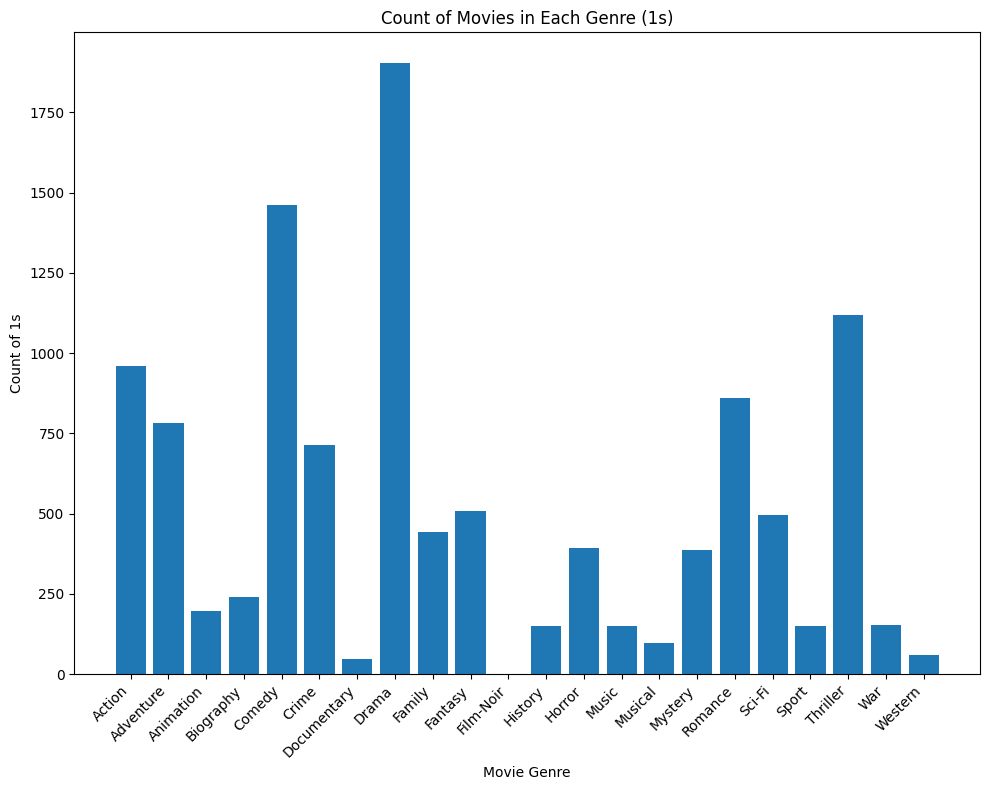

In [282]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(genre_dist.index, genre_dist.values)
plt.xlabel('Movie Genre')
plt.ylabel('Count of 1s')
plt.title('Count of Movies in Each Genre (1s)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

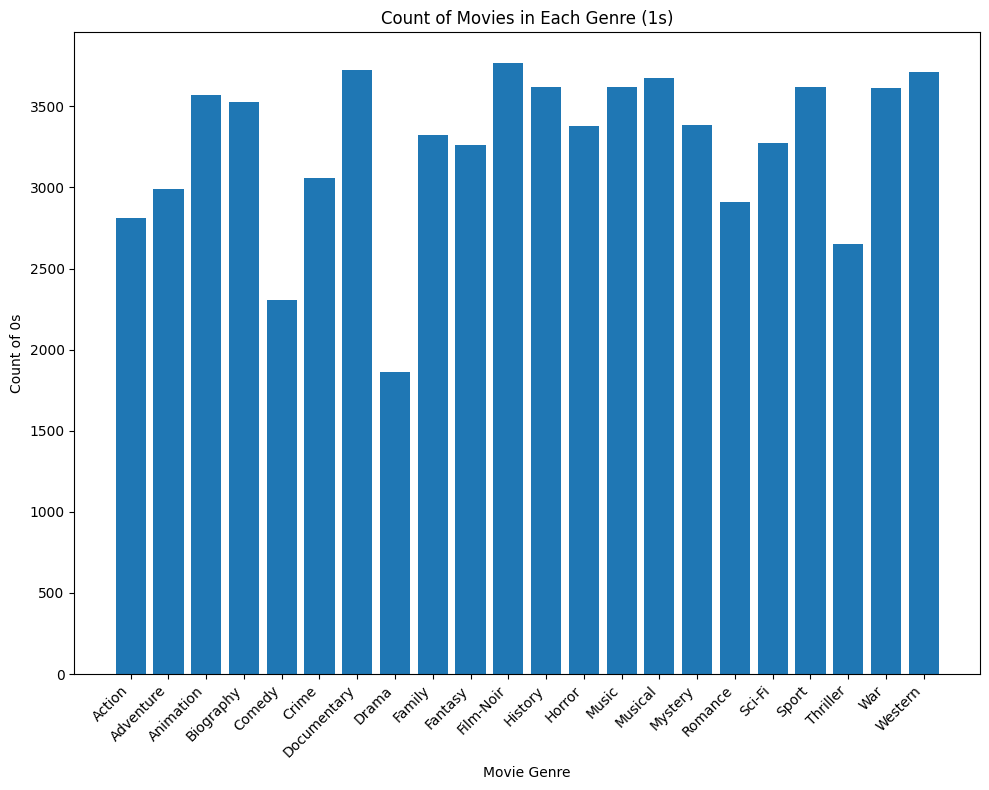

In [284]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(number_of_zeros.index, number_of_zeros.values)
plt.xlabel('Movie Genre')
plt.ylabel('Count of 0s')
plt.title('Count of Movies in Each Genre (1s)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [292]:
number_of_ones = genre_dist

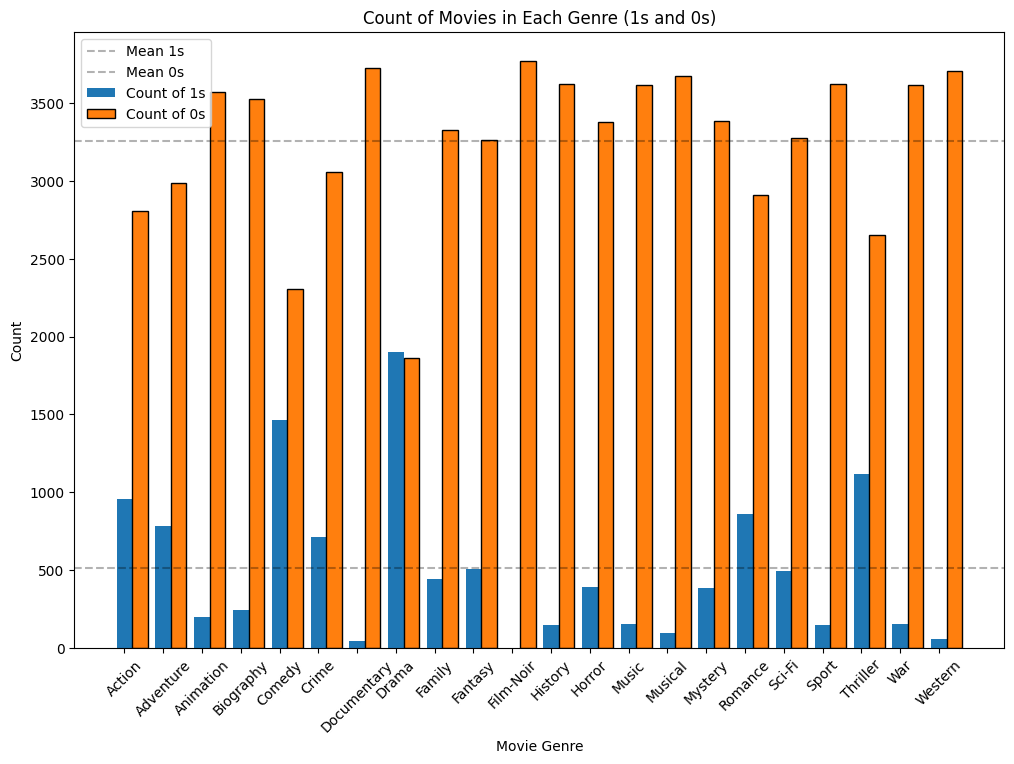

In [334]:
# Create a bar graph with two sets of bars
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
bar_width = 0.4  # Adjust bar width for better visualization

# Calculate positions for each bar set (avoiding string concatenation)
bar_positions_ones = number_of_ones.index
bar_positions_zeros = [p + bar_width for p in range(len(bar_positions_ones))]

# Plot bars for number of 1s and 0s
plt.bar(bar_positions_ones, number_of_ones.values, 
        bar_width, label='Count of 1s')
plt.bar(bar_positions_zeros, number_of_zeros.values, 
        bar_width, label='Count of 0s', edgecolor = 'black')

plt.axhline(y = genre_dist.mean(),
            color = 'black', linestyle = '--', alpha = 0.3, label = "Mean 1s")
plt.axhline(y = number_of_zeros.mean(),
            color = 'black', linestyle = '--', alpha = 0.3, label = "Mean 0s")

plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Count of Movies in Each Genre (1s and 0s)')
plt.xticks(bar_positions_ones, number_of_ones.index, rotation=45, ha='center')  # Rotate x-axis labels
plt.legend()  # Add legend to differentiate bars
# plt.tight_layout()
# plt.grid()
plt.show()

In [339]:
languages = processed_labels['language']
languages
# df['language_label']

{'Aboriginal': 0,
 'Arabic': 1,
 'Aramaic': 2,
 'Bosnian': 3,
 'Cantonese': 4,
 'Czech': 5,
 'Danish': 6,
 'Dari': 7,
 'Dutch': 8,
 'English': 9,
 'Filipino': 10,
 'French': 11,
 'German': 12,
 'Hebrew': 13,
 'Hindi': 14,
 'Hungarian': 15,
 'Indonesian': 16,
 'Italian': 17,
 'Japanese': 18,
 'Kazakh': 19,
 'Korean': 20,
 'Mandarin': 21,
 'Maya': 22,
 'Mongolian': 23,
 'Norwegian': 24,
 'Persian': 25,
 'Portuguese': 26,
 'Romanian': 27,
 'Russian': 28,
 'Spanish': 29,
 'Thai': 30,
 'Vietnamese': 31,
 'Zulu': 32}

In [349]:
df['language_label'].value_counts()

language_label
9     3611
11      34
29      23
21      15
12      11
18      10
17       7
4        7
26       5
14       5
20       5
24       4
8        3
25       3
30       3
6        3
0        2
7        2
16       2
5        1
10       1
31       1
15       1
32       1
27       1
2        1
22       1
1        1
13       1
3        1
19       1
23       1
28       1
Name: count, dtype: int64

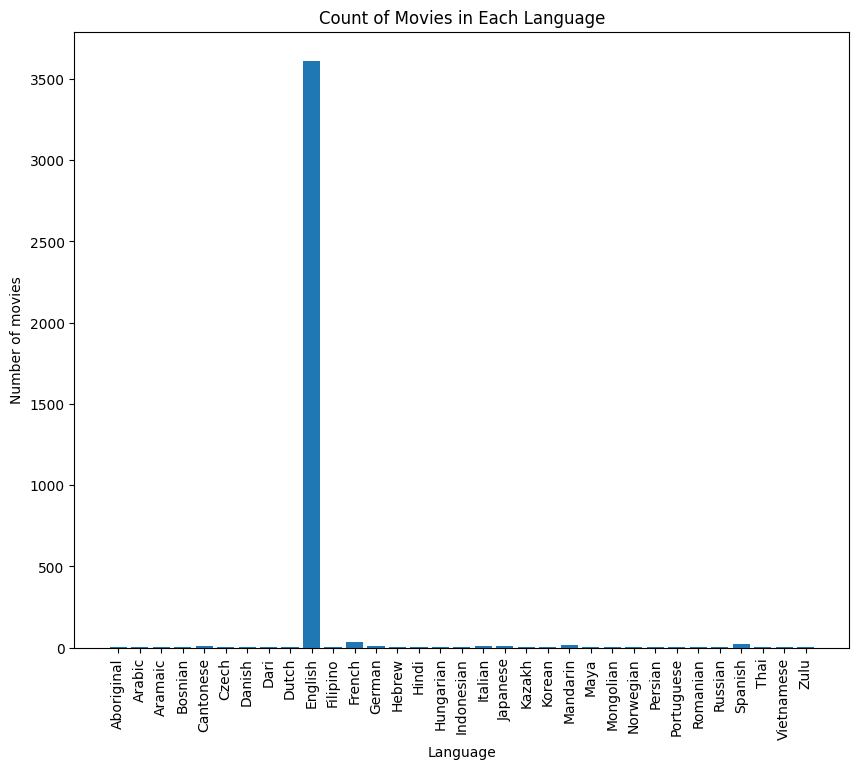

In [367]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
l = df['language_label'].value_counts()
plt.bar(l.index, l.values)
plt.xlabel('Language')
plt.ylabel('Number of movies')
plt.title('Count of Movies in Each Language')
plt.xticks(range(len(languages)), 
           list(languages.keys()),  rotation=90, ha='center')  # Rotate x-axis labels for better readability
# plt.tight_layout()
plt.show()